## Time series Forecasting with TensorFlow

## Getting the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-23 20:17:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-04-23 20:17:49 (20.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd

# Let's read in Bitcoin data and parse the dates
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"]#parse the date column and tell pandas column 1 is datetime
               
               )
df.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# Length of samples
len(df)

2787

In [5]:
# Only want closing price of each day
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

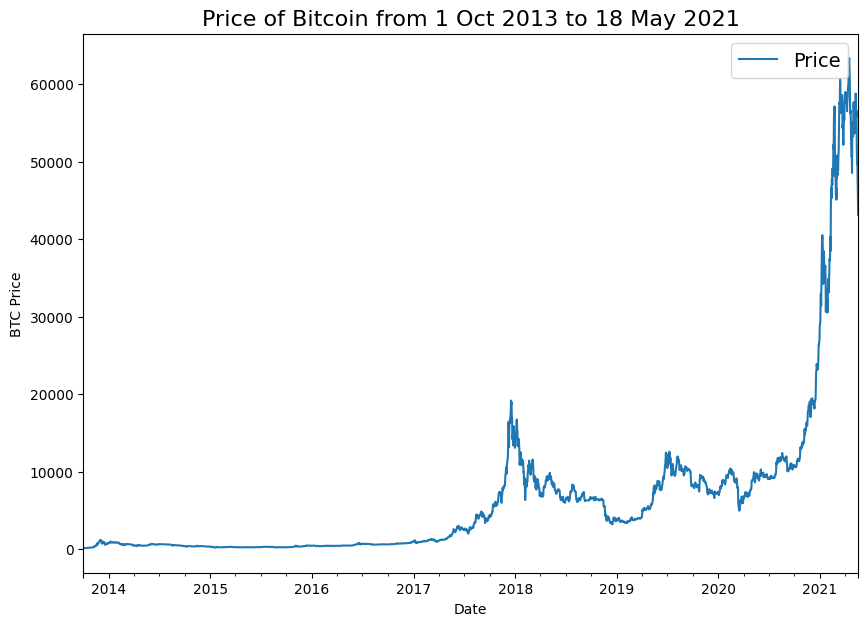

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

# Importing time series data with Python CSV module

In [7]:
# Importing and formatiing historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader)#skip top row/line ,column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))# get dates as dates not string
    btc_price.append(float(line[2]))

#View first 10 of each
timesteps[:10],btc_price[:10]    

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

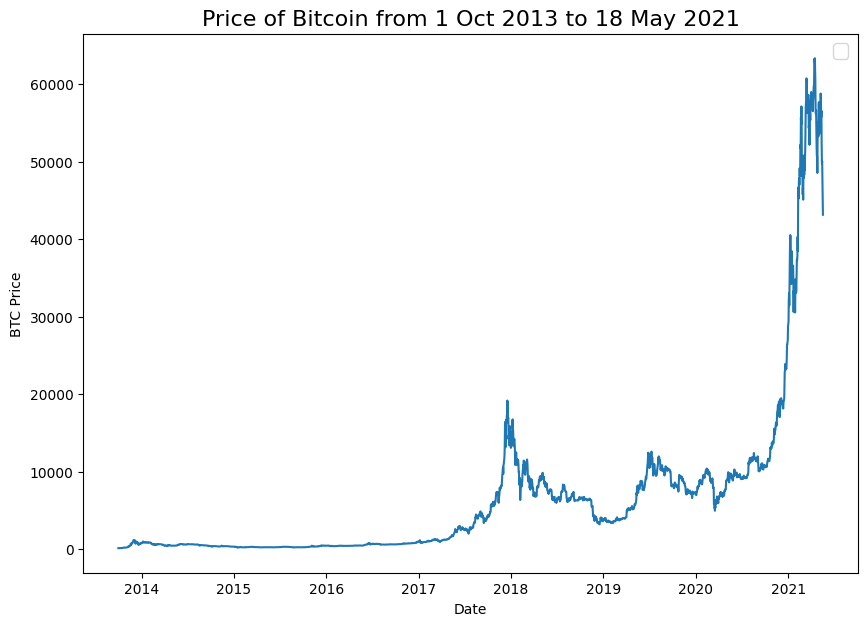

In [8]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16)
plt.legend(fontsize=14);

## Create data part1: train and test sets of time-series data

### Creating training and test sets with time series data(wrong way)

In [9]:
# Get bitcoin date array
timesteps=bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(timesteps,prices,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

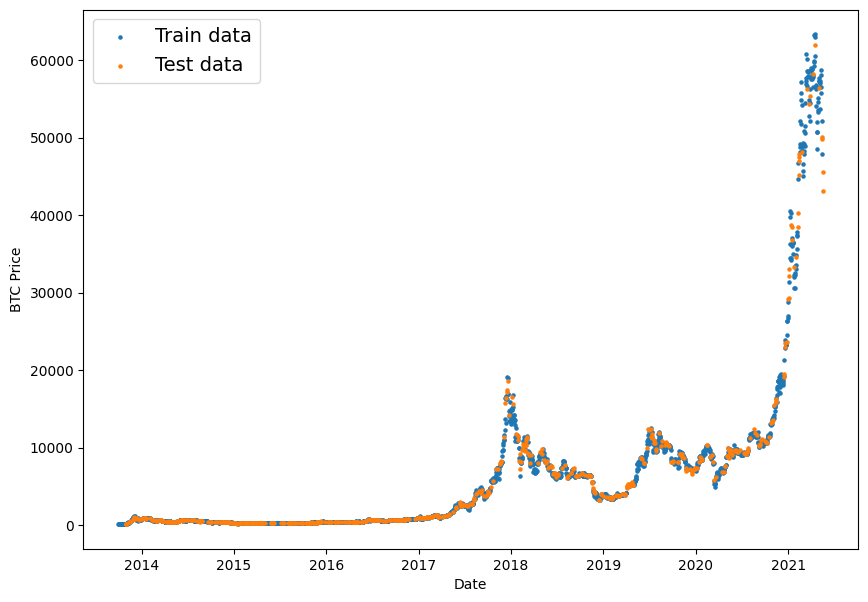

In [11]:
# Plotting wrong  train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create train & test set (right way)

In [12]:
#Create train and test splits the right
split_size=int(0.8*len(prices))#80% train,20% test

#Create train data splits(everything before the split)
X_train,y_train=timesteps[:split_size],prices[:split_size]

#Create test data splits (everything beyond split)
X_test,y_test=timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test)

(2229, 558)

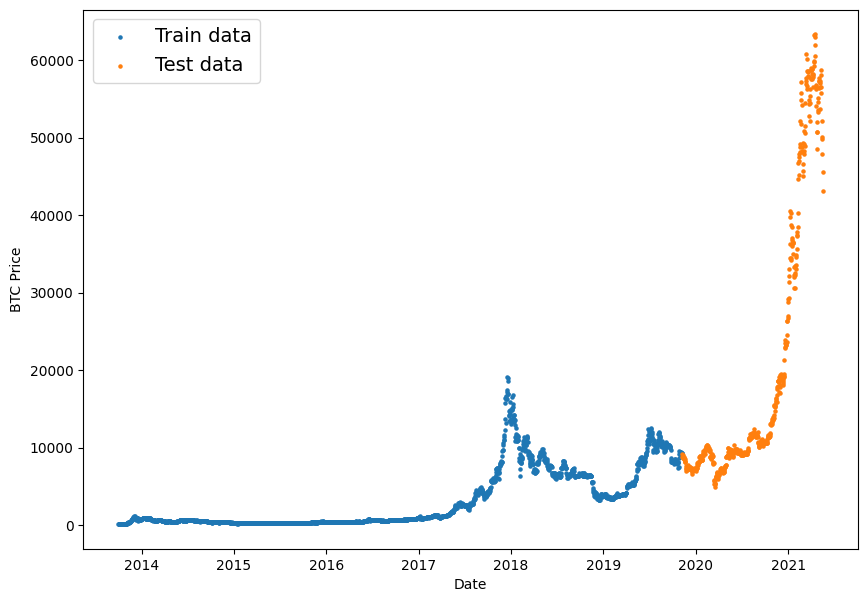

In [13]:
#Plot correctly made split
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

In [14]:
## Creating plotting function
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None,ylabel="BTC Price"):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  #Plot the series
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel(ylabel)
  if label:
    plt.legend(fontsize=14)#Make label bigger
  plt.grid(True)  



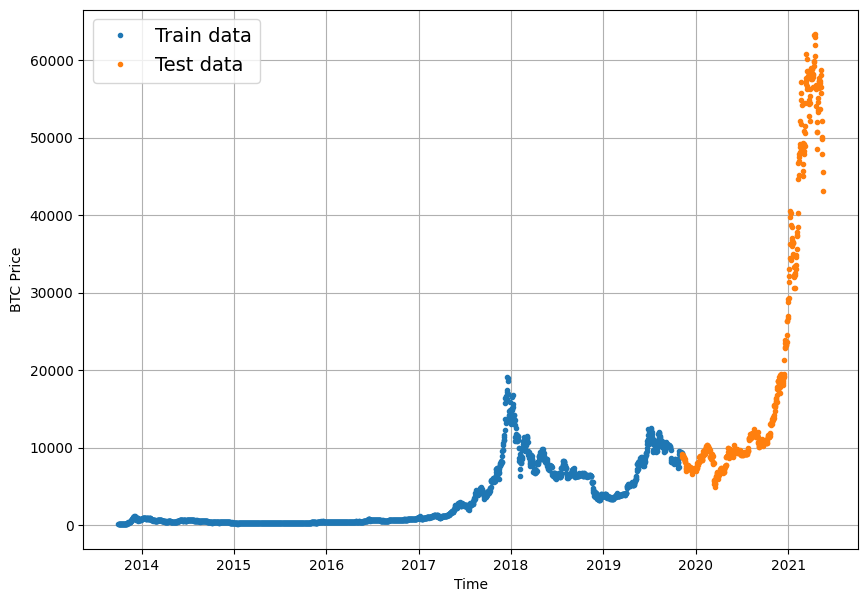

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiment
* Horizon= no of timesteps into the future we're going to predict
* Window size= no of timesteps we're going to use to predict horizon


## Model 0 : Naive forecast (baseline)

In [16]:
# Create naive forecast
naive_forecast=y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

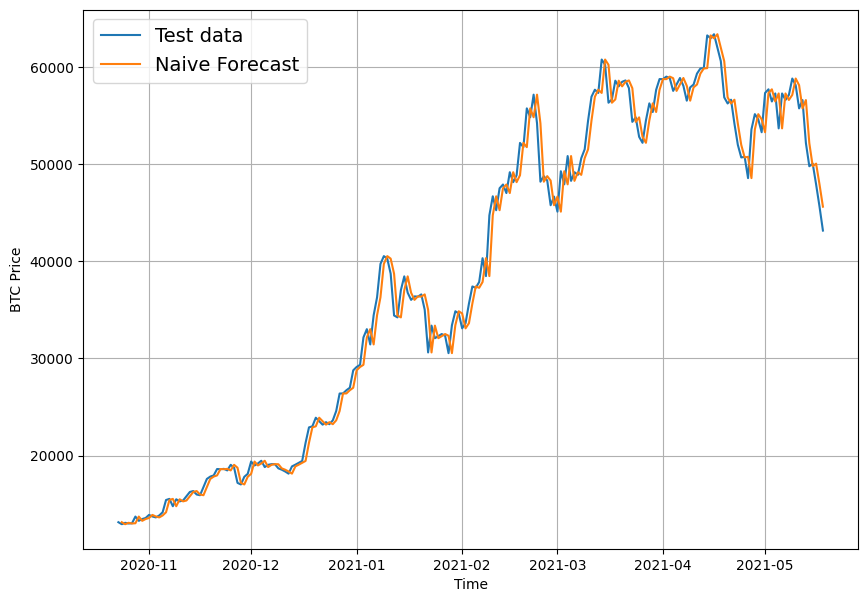

In [17]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,start=350 ,label="Test data",format="-")
plot_time_series(X_test[1:],values=naive_forecast,start=350,format="-",label="Naive Forecast")

## Model 0: Naive forecast (baseline)

## Evaluating a time series model
* Some evaluation metrics for time series forecasting.

* We're predicting a number, means regression problem

* So some regression metrics are:

* MAE - mean absolute error

*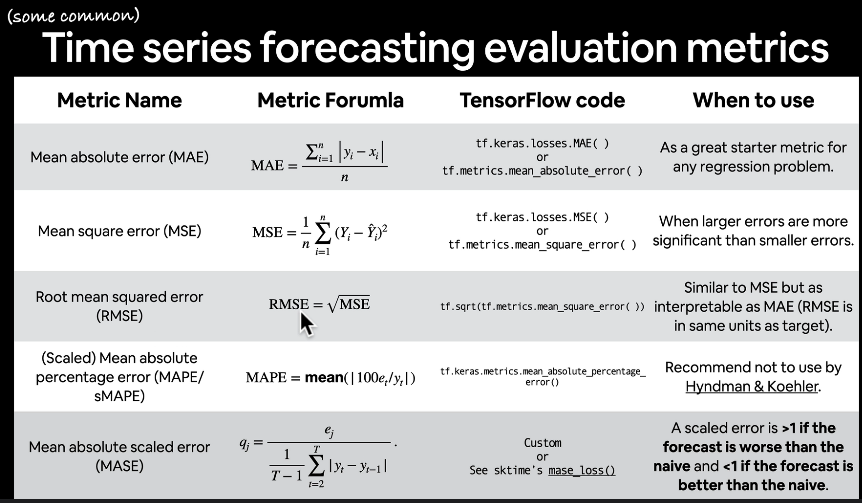 MSE - mean squared error





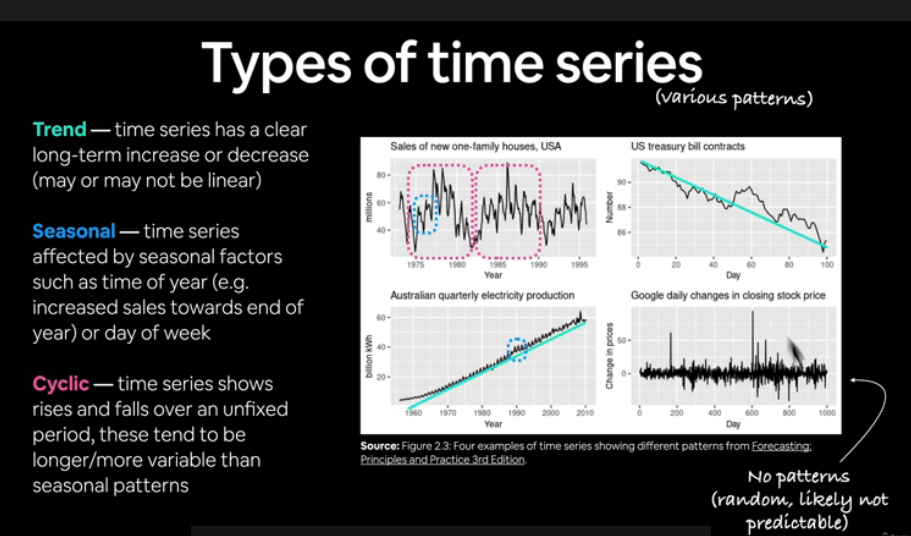

In [18]:
import tensorflow as tf


In [19]:
# MASE implementation

def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)

  mae_naice_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naice_no_season
   



In [20]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)._numpy()

0.9995699939182624

In [21]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  #make sure float 32 datatype (for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  #Calculate various evaluation metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return{ "mae":mae.numpy(),
         "mape":mape.numpy(),
         "mase":mase.numpy(),
         "mse":mse.numpy(),
         "rmse":rmse.numpy()
          
  }



In [22]:
naive_results=evaluate_preds(y_true=y_test[1:],
                             y_pred=naive_forecast
                             )
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [23]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [24]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [25]:
tf.reduce_min(y_test),tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Example of Time series Problems
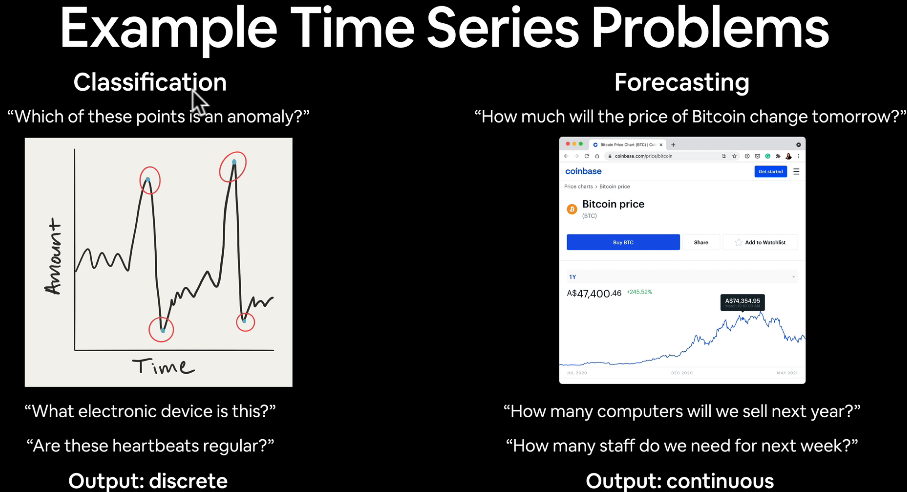

## Format Data Part 2 : Windowing our dataset
Why window ? => Coz we turn our dataset into a suprevised learning problem.

In [26]:
len(y_train)

2229

In [27]:
# What we want to do with our Bitcoin data
print(f"We want to use:{btc_price[:7]} to predict this :{btc_price[7]}")
#Here window size=7 and horizon =1

We want to use:[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this :123.033


In [28]:
# Setting gobal variable for window and horizon size
HORIZON=1 #predict next one day
WINDOW_SIZE=7 # use past week of bitcoin data to make prediction

In [29]:
# Create function to label window data
def get_labelled_window(x,horizon=HORIZON):
  """
  Create labels for windowed dataset.
  
  Eg. if horizon =1
  Input:[0,1,2,3,4,5,6,7]->Output:([0,1,2,3,4,5,6],[7])
  
  """
  return x[:,:-horizon],x[:,-horizon:]

In [30]:
# Testing out window labelling fuction
test_window,test_label=get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [31]:
tf.expand_dims(tf.range(8)+1,axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [32]:
# Test out the window labelling function
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [33]:
import numpy as np

In [34]:
 # Create Function to view numpy arrays as windows

def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  """
  Turns a 1D array to a 2D array of sequential labbeled windows of window_size with horizon size labels.
  """
  #1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  #2. Create a 2D array of multiple window steps (-1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T#create 2D array of windows of size Window size
  # print(f"Window index:\n{window_indexes,window_indexes.shape}")
  #3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array=x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows,labels=get_labelled_window(windowed_array,horizon=horizon)
  return windows,labels

In [35]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [36]:
 # View the first 3 widnows/labels

 for i in range(3):
   print(f"Window:{full_windows[i]} -> Label :{full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label :[123.033]
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label :[124.049]
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label :[125.96116]


## Turning windows into  Training and test sets

In [37]:
#Make the train/test splits

def make_train_test_splits(windows,labels,test_split=0.2):
  """
  Splits matching pair of windows and labels into train and test split.
  """
  split_size=int(len(windows)*(1-test_split))# This will default 80% train/20% test
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]
  return train_windows,test_windows,train_labels,test_labels


In [38]:
# Create train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows)

(2224, 556)

In [39]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [40]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Making Modelling Checkpoint

In [41]:
import os 

# Create a function to implement a ModelCheckpoint callback with specific filename

def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True
                                            )

## Model 1: Dense model (window =7 , horizon=1)

In [42]:
from tensorflow.keras import layers

#Set random seed for reproducible results as possible
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

model_1.compile(
    loss=tf.keras.losses.mae,
    metrics=["mae","mse"],
    optimizer="Adam"
)

In [43]:
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 3513.6382 - mae: 3513.6382 - mse: 32115588.0000  

18/18 [==============================] - 6s 49ms/step - loss: 3471.8936 - mae: 3471.8936 - mse: 31547428.0000 - val_loss: 9519.9258 - val_mae: 9519.9258 - val_mse: 161368640.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 585.0147 - mae: 585.0147 - mse: 1227466.3750  

18/18 [==============================] - 1s 32ms/step - loss: 585.0147 - mae: 585.0147 - mse: 1227466.3750 - val_loss: 1947.3491 - val_mae: 1947.3491 - val_mse: 10090662.0000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 244.0556 - mae: 244.0556 - mse: 252965.0000

18/18 [==============================] - 1s 37ms/step - loss: 244.0556 - mae: 244.0556 - mse: 252965.0000 - val_loss: 1163.1952 - val_mae: 1163.1952 - val_mse: 4395770.5000
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 218.0035 - mae: 218.0035 - mse: 233141.5469

18/18 [==============================] - 1s 48ms/step - loss: 209.6022 - mae: 209.6022 - mse: 217644.5938 - val_loss: 1064.7177 - val_mae: 1064.7177 - val_mse: 3798179.2500
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 197.4408 - mae: 197.4408 - mse: 201719.0312

18/18 [==============================] - 1s 42ms/step - loss: 192.1875 - mae: 192.1875 - mse: 187234.4219 - val_loss: 1041.3516 - val_mae: 1041.3516 - val_mse: 3616936.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 192.3993 - mae: 192.3993 - mse: 187983.3281 - val_loss: 1086.2786 - val_mae: 1086.2786 - val_mse: 3875490.0000
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 188.4157 - mae: 188.4157 - mse: 183156.2656

18/18 [==============================] - 1s 35ms/step - loss: 188.4157 - mae: 188.4157 - mse: 183156.2656 - val_loss: 1001.2725 - val_mae: 1001.2725 - val_mse: 3341341.5000
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 179.7774 - mae: 179.7774 - mse: 169062.2969 - val_loss: 1005.3636 - val_mae: 1005.3636 - val_mse: 3226361.7500
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 178.3702 - mae: 178.3702 - mse: 168736.8438

18/18 [==============================] - 1s 34ms/step - loss: 175.3905 - mae: 175.3905 - mse: 162879.9531 - val_loss: 994.2468 - val_mae: 994.2468 - val_mse: 3109040.2500
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 169.5898 - mae: 169.5898 - mse: 154469.6250

18/18 [==============================] - 1s 35ms/step - loss: 172.2940 - mae: 172.2940 - mse: 157295.6562 - val_loss: 958.2364 - val_mae: 958.2364 - val_mse: 2930748.0000
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 168.6390 - mae: 168.6390 - mse: 150444.3906

18/18 [==============================] - 1s 45ms/step - loss: 168.4692 - mae: 168.4692 - mse: 149098.5625 - val_loss: 912.9504 - val_mae: 912.9504 - val_mse: 2791561.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 164.3701 - mae: 164.3701 - mse: 142428.2500 - val_loss: 1010.4246 - val_mae: 1010.4246 - val_mse: 2945660.2500
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 161.3613 - mae: 161.3613 - mse: 141350.3125

18/18 [==============================] - 1s 34ms/step - loss: 162.2170 - mae: 162.2170 - mse: 140303.1875 - val_loss: 908.5923 - val_mae: 908.5924 - val_mse: 2565635.2500
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 158.8596 - mae: 158.8596 - mse: 135573.0938

18/18 [==============================] - 1s 62ms/step - loss: 156.2078 - mae: 156.2078 - mse: 131157.7812 - val_loss: 855.8664 - val_mae: 855.8664 - val_mse: 2380374.5000
Epoch 15/100
18/18 [==============================] - 0s 12ms/step - loss: 161.1110 - mae: 161.1110 - mse: 134097.5156 - val_loss: 923.9148 - val_mae: 923.9148 - val_mse: 2494646.2500
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 149.9230 - mae: 149.9230 - mse: 122086.0703

18/18 [==============================] - 1s 61ms/step - loss: 149.9230 - mae: 149.9230 - mse: 122086.0703 - val_loss: 817.3701 - val_mae: 817.3701 - val_mse: 2158921.0000
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 151.4069 - mae: 151.4069 - mse: 125461.4375

18/18 [==============================] - 2s 96ms/step - loss: 145.1043 - mae: 145.1043 - mse: 115987.6953 - val_loss: 803.7055 - val_mae: 803.7055 - val_mse: 2064071.8750
Epoch 18/100
18/18 [==============================] - 0s 15ms/step - loss: 140.2033 - mae: 140.2033 - mse: 109512.1328 - val_loss: 829.3398 - val_mae: 829.3398 - val_mse: 2079261.0000
Epoch 19/100
18/18 [==============================] - 0s 18ms/step - loss: 137.1903 - mae: 137.1903 - mse: 105411.7656 - val_loss: 804.2421 - val_mae: 804.2421 - val_mse: 1971989.1250
Epoch 20/100
13/18 [====================>.........] - ETA: 0s - loss: 141.7502 - mae: 141.7502 - mse: 110160.1562

18/18 [==============================] - 2s 96ms/step - loss: 138.2236 - mae: 138.2236 - mse: 107181.2422 - val_loss: 746.8097 - val_mae: 746.8097 - val_mse: 1869461.3750
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 143.3999 - mae: 143.3999 - mse: 104947.2734

18/18 [==============================] - 1s 67ms/step - loss: 136.1830 - mae: 136.1830 - mse: 102957.8125 - val_loss: 733.6714 - val_mae: 733.6714 - val_mse: 1806429.6250
Epoch 22/100
 9/18 [==============>...............] - ETA: 0s - loss: 152.0717 - mae: 152.0717 - mse: 133417.0625

18/18 [==============================] - 1s 62ms/step - loss: 134.3591 - mae: 134.3591 - mse: 100848.3359 - val_loss: 723.4554 - val_mae: 723.4554 - val_mse: 1757012.0000
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 125.6359 - mae: 125.6359 - mse: 80051.5469 

18/18 [==============================] - 1s 66ms/step - loss: 130.3849 - mae: 130.3849 - mse: 95745.1250 - val_loss: 698.0044 - val_mae: 698.0044 - val_mse: 1630632.0000
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 129.3911 - mae: 129.3911 - mse: 101085.7812

18/18 [==============================] - 1s 67ms/step - loss: 131.4461 - mae: 131.4461 - mse: 96157.6328 - val_loss: 686.9423 - val_mae: 686.9423 - val_mse: 1586104.0000
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 137.3419 - mae: 137.3419 - mse: 99816.4609 

18/18 [==============================] - 1s 77ms/step - loss: 134.1637 - mae: 134.1637 - mse: 95022.5000 - val_loss: 679.8773 - val_mae: 679.8773 - val_mse: 1548893.8750
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 124.5209 - mae: 124.5209 - mse: 88471.2266

18/18 [==============================] - 1s 75ms/step - loss: 124.5209 - mae: 124.5209 - mse: 88471.2266 - val_loss: 677.9001 - val_mae: 677.9001 - val_mse: 1556201.2500
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 129.4905 - mae: 129.4905 - mse: 95884.7109 

18/18 [==============================] - 1s 65ms/step - loss: 124.2212 - mae: 124.2212 - mse: 88829.1328 - val_loss: 660.7125 - val_mae: 660.7125 - val_mse: 1483211.0000
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 122.2822 - mae: 122.2822 - mse: 81354.8828

18/18 [==============================] - 1s 61ms/step - loss: 122.6411 - mae: 122.6411 - mse: 85289.9062 - val_loss: 657.3845 - val_mae: 657.3845 - val_mse: 1455950.0000
Epoch 29/100
18/18 [==============================] - 0s 18ms/step - loss: 120.9033 - mae: 120.9033 - mse: 85644.0781 - val_loss: 718.9031 - val_mae: 718.9031 - val_mse: 1581393.0000
Epoch 30/100
18/18 [==============================] - 0s 15ms/step - loss: 126.3609 - mae: 126.3609 - mse: 87663.3281 - val_loss: 737.7162 - val_mae: 737.7162 - val_mse: 1630164.5000
Epoch 31/100
18/18 [==============================] - 0s 18ms/step - loss: 134.2751 - mae: 134.2751 - mse: 93121.2734 - val_loss: 877.1992 - val_mae: 877.1992 - val_mse: 2072900.3750
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 134.8433 - mae: 134.8433 - mse: 90799.0625

18/18 [==============================] - 3s 159ms/step - loss: 134.8433 - mae: 134.8433 - mse: 90799.0625 - val_loss: 634.3000 - val_mae: 634.3000 - val_mse: 1384831.6250
Epoch 33/100
18/18 [==============================] - 0s 17ms/step - loss: 123.7298 - mae: 123.7298 - mse: 81710.2109 - val_loss: 635.9120 - val_mae: 635.9120 - val_mse: 1392606.5000
Epoch 34/100
18/18 [==============================] - 0s 17ms/step - loss: 118.6274 - mae: 118.6274 - mse: 82692.7500 - val_loss: 635.0984 - val_mae: 635.0984 - val_mse: 1365844.0000
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 117.1083 - mae: 117.1083 - mse: 83551.8906

18/18 [==============================] - 1s 75ms/step - loss: 116.9106 - mae: 116.9106 - mse: 81429.6797 - val_loss: 622.9330 - val_mae: 622.9330 - val_mse: 1341996.0000
Epoch 36/100
18/18 [==============================] - 0s 19ms/step - loss: 121.4617 - mae: 121.4617 - mse: 81952.7734 - val_loss: 669.8743 - val_mae: 669.8743 - val_mse: 1430565.5000
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 120.0338 - mae: 120.0338 - mse: 83279.4688

18/18 [==============================] - 1s 66ms/step - loss: 120.0338 - mae: 120.0338 - mse: 83279.4688 - val_loss: 617.6273 - val_mae: 617.6273 - val_mse: 1320551.1250
Epoch 38/100
18/18 [==============================] - 0s 12ms/step - loss: 116.7310 - mae: 116.7310 - mse: 80753.6797 - val_loss: 625.4124 - val_mae: 625.4124 - val_mse: 1349503.8750
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 118.2722 - mae: 118.2722 - mse: 80933.8438 - val_loss: 694.1077 - val_mae: 694.1076 - val_mse: 1542982.0000
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 116.6158 - mae: 116.6158 - mse: 80798.0156

18/18 [==============================] - 1s 58ms/step - loss: 115.9306 - mae: 115.9306 - mse: 79778.2969 - val_loss: 610.8837 - val_mae: 610.8837 - val_mse: 1300010.7500
Epoch 41/100
18/18 [==============================] - 0s 12ms/step - loss: 114.5132 - mae: 114.5132 - mse: 77950.4141 - val_loss: 612.9647 - val_mae: 612.9647 - val_mse: 1306832.1250
Epoch 42/100
18/18 [==============================] - 0s 15ms/step - loss: 117.9901 - mae: 117.9901 - mse: 80931.1328 - val_loss: 612.5404 - val_mae: 612.5404 - val_mse: 1288519.0000
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2553 - mae: 115.2553 - mse: 76388.0078 - val_loss: 643.9321 - val_mae: 643.9321 - val_mse: 1386963.7500
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 117.5087 - mae: 117.5087 - mse: 79818.0312 - val_loss: 624.6459 - val_mae: 624.6459 - val_mse: 1333680.5000
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 113.8554 - mae: 113.8554 -

18/18 [==============================] - 1s 68ms/step - loss: 114.4228 - mae: 114.4228 - mse: 78084.8203 - val_loss: 600.1705 - val_mae: 600.1705 - val_mse: 1261375.2500
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6489 - mae: 112.6489 - mse: 77062.0391 - val_loss: 600.4763 - val_mae: 600.4763 - val_mse: 1253685.1250
Epoch 48/100
18/18 [==============================] - 0s 10ms/step - loss: 112.8067 - mae: 112.8067 - mse: 75715.0547 - val_loss: 634.7546 - val_mae: 634.7546 - val_mse: 1327055.2500
Epoch 49/100
18/18 [==============================] - 0s 13ms/step - loss: 126.3627 - mae: 126.3627 - mse: 82268.6094 - val_loss: 605.9274 - val_mae: 605.9274 - val_mse: 1260505.3750
Epoch 50/100
18/18 [==============================] - 0s 16ms/step - loss: 113.6455 - mae: 113.6455 - mse: 78130.4141 - val_loss: 648.2847 - val_mae: 648.2847 - val_mse: 1384630.7500
Epoch 51/100
 8/18 [============>.................] - ETA: 0s - loss: 114.0877 - mae: 114.0877 - m

18/18 [==============================] - 1s 36ms/step - loss: 118.1728 - mae: 118.1728 - mse: 79782.3984 - val_loss: 599.1466 - val_mae: 599.1466 - val_mse: 1257905.8750
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6947 - mae: 113.6947 - mse: 76820.9766 - val_loss: 603.5561 - val_mae: 603.5561 - val_mse: 1268210.2500
Epoch 53/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7287 - mae: 116.7287 - mse: 78756.4844

18/18 [==============================] - 1s 34ms/step - loss: 116.2828 - mae: 116.2828 - mse: 78061.9922 - val_loss: 594.6026 - val_mae: 594.6026 - val_mse: 1232666.2500
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4264 - mae: 113.4264 - mse: 76220.0859 - val_loss: 617.0183 - val_mae: 617.0183 - val_mse: 1281575.8750
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 121.1475 - mae: 121.1475 - mse: 86610.7031

18/18 [==============================] - 1s 53ms/step - loss: 113.6319 - mae: 113.6319 - mse: 77010.0234 - val_loss: 589.2574 - val_mae: 589.2574 - val_mse: 1224372.2500
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0380 - mae: 111.0380 - mse: 74444.4141 - val_loss: 757.1613 - val_mae: 757.1613 - val_mse: 1708336.2500
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 121.1375 - mae: 121.1375 - mse: 82092.4766 - val_loss: 657.4626 - val_mae: 657.4626 - val_mse: 1397729.0000
Epoch 58/100
12/18 [===================>..........] - ETA: 0s - loss: 118.3691 - mae: 118.3691 - mse: 78843.5547

18/18 [==============================] - 1s 49ms/step - loss: 118.0734 - mae: 118.0734 - mse: 76053.2109 - val_loss: 587.4594 - val_mae: 587.4594 - val_mse: 1217829.5000
Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 111.9865 - mae: 111.9865 - mse: 74819.8906 - val_loss: 590.6493 - val_mae: 590.6493 - val_mse: 1234053.5000
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0821 - mae: 111.0821 - mse: 73943.8203 - val_loss: 613.5869 - val_mae: 613.5869 - val_mse: 1270054.2500
Epoch 61/100
12/18 [===================>..........] - ETA: 0s - loss: 109.7543 - mae: 109.7543 - mse: 68590.1172 

18/18 [==============================] - 1s 33ms/step - loss: 114.3422 - mae: 114.3422 - mse: 77116.3203 - val_loss: 585.2422 - val_mae: 585.2422 - val_mse: 1208623.0000
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9552 - mae: 109.9552 - mse: 73088.6797 - val_loss: 593.8906 - val_mae: 593.8906 - val_mse: 1240129.8750
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8574 - mae: 115.8574 - mse: 77009.2188 - val_loss: 652.6128 - val_mae: 652.6128 - val_mse: 1353638.2500
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2090 - mae: 116.2090 - mse: 76415.9062 - val_loss: 684.1843 - val_mae: 684.1843 - val_mse: 1431191.2500
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0045 - mae: 117.0045 - mse: 77426.1484 - val_loss: 586.7429 - val_mae: 586.7429 - val_mse: 1205746.8750
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 117.0641 - mae: 117.0641 - m

18/18 [==============================] - 1s 32ms/step - loss: 109.2728 - mae: 109.2728 - mse: 72499.2578 - val_loss: 580.3070 - val_mae: 580.3070 - val_mse: 1203408.5000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1317 - mae: 113.1317 - mse: 74655.2188 - val_loss: 659.7036 - val_mae: 659.7036 - val_mse: 1385170.6250
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 108.8832 - mae: 108.8832 - mse: 72152.1328 

18/18 [==============================] - 1s 32ms/step - loss: 108.8832 - mae: 108.8832 - mse: 72152.1328 - val_loss: 578.9678 - val_mae: 578.9678 - val_mse: 1189008.3750
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7280 - mae: 109.7280 - mse: 71686.1250 - val_loss: 588.4369 - val_mae: 588.4369 - val_mse: 1207098.3750
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9757 - mae: 111.9757 - mse: 73956.4375 - val_loss: 610.4802 - val_mae: 610.4802 - val_mse: 1267684.5000
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6240 - mae: 110.6240 - mse: 72450.3125 - val_loss: 579.6850 - val_mae: 579.6850 - val_mse: 1202746.1250
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 112.5747 - mae: 112.5747 - mse: 74487.1406

18/18 [==============================] - 1s 32ms/step - loss: 111.6430 - mae: 111.6430 - mse: 73293.7109 - val_loss: 575.6896 - val_mae: 575.6896 - val_mse: 1191140.6250
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8976 - mae: 108.8976 - mse: 72821.1328 - val_loss: 587.3754 - val_mae: 587.3754 - val_mse: 1220504.8750
Epoch 80/100
18/18 [==============================] - ETA: 0s - loss: 108.6122 - mae: 108.6122 - mse: 71839.2578 

18/18 [==============================] - 1s 34ms/step - loss: 108.6122 - mae: 108.6122 - mse: 71839.2578 - val_loss: 575.3795 - val_mae: 575.3795 - val_mse: 1190180.1250
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3573 - mae: 107.3573 - mse: 70398.8516 - val_loss: 575.8818 - val_mae: 575.8818 - val_mse: 1187496.5000
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3764 - mae: 114.3764 - mse: 76222.7969 - val_loss: 576.4841 - val_mae: 576.4841 - val_mse: 1185063.5000
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3521 - mae: 113.3521 - mse: 74643.6797 - val_loss: 674.5516 - val_mae: 674.5516 - val_mse: 1428592.6250
Epoch 84/100
17/18 [===========================>..] - ETA: 0s - loss: 117.8923 - mae: 117.8923 - mse: 76217.3984

18/18 [==============================] - 1s 47ms/step - loss: 117.3893 - mae: 117.3893 - mse: 75597.2812 - val_loss: 574.5466 - val_mae: 574.5466 - val_mse: 1187161.1250
Epoch 85/100
17/18 [===========================>..] - ETA: 0s - loss: 107.9150 - mae: 107.9150 - mse: 69121.2031

18/18 [==============================] - 1s 33ms/step - loss: 109.5934 - mae: 109.5934 - mse: 72368.3516 - val_loss: 574.1010 - val_mae: 574.1010 - val_mse: 1188965.8750
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2047 - mae: 109.2047 - mse: 71357.3203 - val_loss: 622.4932 - val_mae: 622.4932 - val_mse: 1274003.6250
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 107.2486 - mae: 107.2486 - mse: 68632.3516 - val_loss: 591.7752 - val_mae: 591.7752 - val_mse: 1224892.1250
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8577 - mae: 107.8577 - mse: 71456.5781 - val_loss: 592.2248 - val_mae: 592.2248 - val_mse: 1228452.0000
Epoch 89/100
17/18 [===========================>..] - ETA: 0s - loss: 105.9267 - mae: 105.9267 - mse: 66446.5859

18/18 [==============================] - 1s 32ms/step - loss: 107.3731 - mae: 107.3731 - mse: 69873.7422 - val_loss: 571.1031 - val_mae: 571.1031 - val_mse: 1178245.6250
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4958 - mae: 106.4958 - mse: 67847.5078 - val_loss: 587.3220 - val_mae: 587.3220 - val_mse: 1197567.2500
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3873 - mae: 110.3873 - mse: 71867.1797 - val_loss: 583.7149 - val_mae: 583.7149 - val_mse: 1207749.2500
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 110.1453 - mae: 110.1453 - mse: 73103.9375

18/18 [==============================] - 1s 33ms/step - loss: 110.2512 - mae: 110.2512 - mse: 72610.4375 - val_loss: 569.0771 - val_mae: 569.0771 - val_mse: 1173194.3750
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2538 - mae: 116.2538 - mse: 75619.4141 - val_loss: 672.2642 - val_mae: 672.2642 - val_mse: 1416885.1250
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.9317 - mae: 112.9317 - mse: 74076.1953 - val_loss: 575.6259 - val_mae: 575.6259 - val_mse: 1178470.6250
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0140 - mae: 108.0140 - mse: 70006.4375 - val_loss: 593.2159 - val_mae: 593.2159 - val_mse: 1207281.7500
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3452 - mae: 114.3452 - mse: 73445.0547 - val_loss: 660.2170 - val_mae: 660.2170 - val_mse: 1387442.8750
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6145 - mae: 111.6145 - m

18/18 [==============================] - 1s 33ms/step - loss: 108.1712 - mae: 108.1712 - mse: 70378.0625 - val_loss: 566.7234 - val_mae: 566.7234 - val_mse: 1167484.7500
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5283 - mae: 107.5283 - mse: 68930.9375 - val_loss: 592.6088 - val_mae: 592.6088 - val_mse: 1205486.0000


In [44]:
#Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 592.6089 - mae: 592.6089 - mse: 1205486.6250


[592.6089477539062, 592.6089477539062, 1205486.625]

In [45]:
model_1=tf.keras.models.load_model("/content/model_experiments/model_1_dense/")

In [46]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.7234 - mae: 566.7234 - mse: 1167485.2500


[566.7234497070312, 566.7234497070312, 1167485.25]

In [47]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecast with a model (on the test dataset)

In [48]:
def make_preds(model,input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast) #return 1D array of predictions

In [49]:
# Make preditions
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8867.181, 8775.777, 9002.977, 8772.164, 8771.82 , 8746.988,
        8671.559, 8522.822, 8473.565, 8515.337], dtype=float32)>)

In [50]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [51]:
test_labels.shape,model_1_preds.shape

((556, 1), TensorShape([556]))

In [52]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

In [53]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

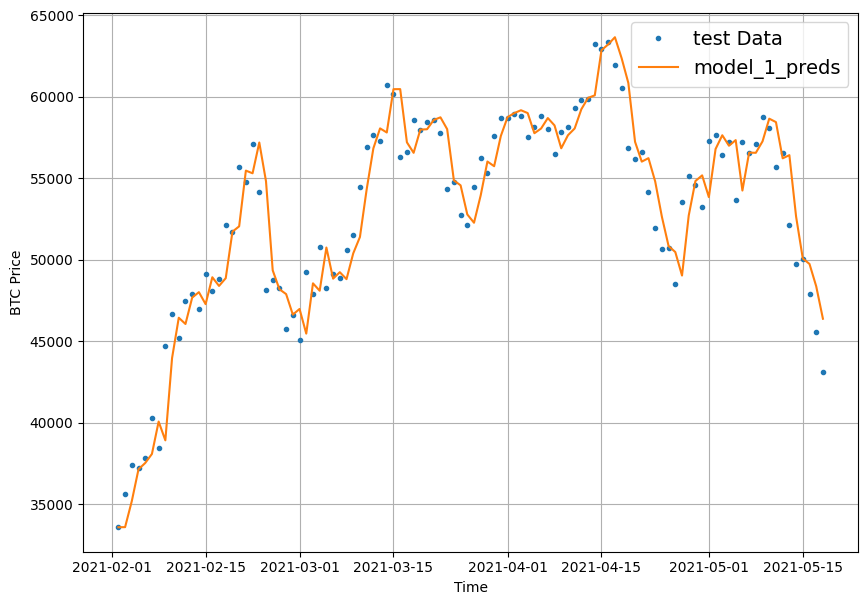

In [54]:
# Plotting model 1 prediction
offset=450
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into  test_labels into ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="test Data")
plot_time_series(
                 timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds"
     
)

## Model 2 : Dense , Window =30 ,Horizon=1

In [55]:
HORIZON=1
WINDOW_SIZE=30

In [56]:
#Make windowed data with appropriate horizon and window series
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [57]:
len(full_windows)

2757

In [58]:
# Make train and testing windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                           labels=full_labels,
                                                                           test_split=0.2
                                                                           )
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [59]:
train_windows[:2],train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499],
        [198.04883]]))

In [60]:
tf.random.set_seed(42)
#Create model
model_2=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_2_Dense")

#Compile
model_2.compile(loss="mae",
                optimizer="Adam",
                 metrics=["mae","mse"]
                )


In [61]:
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)]
            )

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1821.6062 - mae: 1821.6062 - mse: 12115117.0000 

18/18 [==============================] - 2s 50ms/step - loss: 1437.7114 - mae: 1437.7114 - mse: 8514785.0000 - val_loss: 4317.3408 - val_mae: 4317.3408 - val_mse: 38419784.0000
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 433.9673 - mae: 433.9673 - mse: 722364.8125 

18/18 [==============================] - 1s 36ms/step - loss: 413.0422 - mae: 413.0422 - mse: 670951.5625 - val_loss: 1773.7959 - val_mae: 1773.7959 - val_mse: 8692294.0000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 262.0124 - mae: 262.0124 - mse: 339134.8125

18/18 [==============================] - 1s 32ms/step - loss: 258.3939 - mae: 258.3939 - mse: 329143.8125 - val_loss: 1424.1866 - val_mae: 1424.1866 - val_mse: 6006517.0000
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 230.7941 - mae: 230.7941 - mse: 279821.3750

18/18 [==============================] - 1s 35ms/step - loss: 234.6016 - mae: 234.6016 - mse: 282487.3438 - val_loss: 1303.7159 - val_mae: 1303.7159 - val_mse: 5182714.0000
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 159.5498 - mae: 159.5498 - mse: 103518.3984

18/18 [==============================] - 1s 33ms/step - loss: 214.9178 - mae: 214.9178 - mse: 238417.5469 - val_loss: 1128.9547 - val_mae: 1128.9547 - val_mse: 4211553.5000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 204.7048 - mae: 204.7048 - mse: 220762.1406

18/18 [==============================] - 1s 33ms/step - loss: 203.7319 - mae: 203.7319 - mse: 218959.7500 - val_loss: 1043.7554 - val_mae: 1043.7554 - val_mse: 3800908.5000
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 185.3320 - mae: 185.3320 - mse: 186843.8906

18/18 [==============================] - 1s 48ms/step - loss: 185.6490 - mae: 185.6490 - mse: 186642.0312 - val_loss: 974.6599 - val_mae: 974.6599 - val_mse: 3336267.5000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 179.7116 - mae: 179.7116 - mse: 173583.6562

18/18 [==============================] - 1s 34ms/step - loss: 179.7116 - mae: 179.7116 - mse: 173583.6562 - val_loss: 946.2720 - val_mae: 946.2720 - val_mse: 2967920.2500
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 165.9977 - mae: 165.9977 - mse: 154138.0469

18/18 [==============================] - 1s 33ms/step - loss: 165.5567 - mae: 165.5567 - mse: 152626.7500 - val_loss: 860.5651 - val_mae: 860.5651 - val_mse: 2525695.5000
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 162.9829 - mae: 162.9829 - mse: 135739.2188 - val_loss: 997.2665 - val_mae: 997.2665 - val_mse: 3190565.7500
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 165.5833 - mae: 165.5833 - mse: 135594.7344

18/18 [==============================] - 1s 34ms/step - loss: 164.9008 - mae: 164.9008 - mse: 134368.4062 - val_loss: 808.0176 - val_mae: 808.0176 - val_mse: 2302441.7500
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 148.0213 - mae: 148.0213 - mse: 122465.4766

18/18 [==============================] - 1s 33ms/step - loss: 147.5077 - mae: 147.5077 - mse: 121917.5469 - val_loss: 798.3264 - val_mae: 798.3264 - val_mse: 2248614.0000
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 157.5819 - mae: 157.5819 - mse: 128955.1406 - val_loss: 811.7734 - val_mae: 811.7734 - val_mse: 2313267.7500
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 196.8999 - mae: 196.8999 - mse: 168979.8750 - val_loss: 1082.8716 - val_mae: 1082.8716 - val_mse: 3504445.2500
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 160.8188 - mae: 160.8188 - mse: 127369.0703 - val_loss: 849.7189 - val_mae: 849.7189 - val_mse: 2415630.0000
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 154.8297 - mae: 154.8297 - mse: 123985.7891

18/18 [==============================] - 1s 33ms/step - loss: 154.8297 - mae: 154.8297 - mse: 123985.7891 - val_loss: 753.4489 - val_mae: 753.4489 - val_mse: 2023939.7500
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 143.7110 - mae: 143.7110 - mse: 111845.6094 - val_loss: 884.9749 - val_mae: 884.9749 - val_mse: 2277211.2500
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 146.3269 - mae: 146.3269 - mse: 112619.6875 - val_loss: 904.1840 - val_mae: 904.1840 - val_mse: 2334740.7500
Epoch 19/100
13/18 [====================>.........] - ETA: 0s - loss: 156.7648 - mae: 156.7648 - mse: 117057.4453

18/18 [==============================] - 1s 34ms/step - loss: 151.4992 - mae: 151.4992 - mse: 115205.3516 - val_loss: 718.4203 - val_mae: 718.4203 - val_mse: 1827395.1250
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 138.2018 - mae: 138.2018 - mse: 105727.4375 - val_loss: 914.9839 - val_mae: 914.9839 - val_mse: 2347904.0000
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 141.1625 - mae: 141.1625 - mse: 109165.4531 - val_loss: 929.8808 - val_mae: 929.8808 - val_mse: 2376066.2500
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 166.4164 - mae: 166.4164 - mse: 126453.9609 - val_loss: 817.6368 - val_mae: 817.6368 - val_mse: 2194972.7500
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 141.9523 - mae: 141.9523 - mse: 104084.7891 - val_loss: 766.6913 - val_mae: 766.6913 - val_mse: 1852916.3750
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 125.0035 - mae: 125.0035 - 

18/18 [==============================] - 1s 33ms/step - loss: 129.6766 - mae: 129.6766 - mse: 95444.6484 - val_loss: 699.0031 - val_mae: 699.0031 - val_mse: 1746845.8750
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 134.0732 - mae: 134.0732 - mse: 98571.1719 - val_loss: 733.5918 - val_mae: 733.5919 - val_mse: 1733690.3750
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 132.2680 - mae: 132.2680 - mse: 93715.9688 - val_loss: 900.0116 - val_mae: 900.0116 - val_mse: 2491964.2500
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 152.1807 - mae: 152.1807 - mse: 110920.1016 - val_loss: 815.9906 - val_mae: 815.9906 - val_mse: 2155001.0000
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 129.9052 - mae: 129.9052 - mse: 95371.2656 - val_loss: 842.3022 - val_mae: 842.3022 - val_mse: 2246478.2500
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 134.9502 - mae: 134.9502 - 

18/18 [==============================] - 1s 49ms/step - loss: 133.2416 - mae: 133.2416 - mse: 91889.3750 - val_loss: 667.2879 - val_mae: 667.2879 - val_mse: 1567776.8750
Epoch 34/100
18/18 [==============================] - 0s 8ms/step - loss: 124.4809 - mae: 124.4809 - mse: 87576.8125 - val_loss: 744.2753 - val_mae: 744.2753 - val_mse: 1821051.7500
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 142.2243 - mae: 142.2243 - mse: 100397.6953 - val_loss: 963.7183 - val_mae: 963.7183 - val_mse: 2691321.5000
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 142.6132 - mae: 142.6132 - mse: 95932.7422

18/18 [==============================] - 1s 46ms/step - loss: 135.6020 - mae: 135.6020 - mse: 92918.1719 - val_loss: 664.8860 - val_mae: 664.8860 - val_mse: 1550922.0000
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 129.2724 - mae: 129.2724 - mse: 90283.3438

18/18 [==============================] - 1s 33ms/step - loss: 129.2724 - mae: 129.2724 - mse: 90283.3438 - val_loss: 660.8952 - val_mae: 660.8952 - val_mse: 1490000.7500
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 135.2977 - mae: 135.2977 - mse: 91159.5156 - val_loss: 664.2527 - val_mae: 664.2527 - val_mse: 1528513.5000
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5939 - mae: 126.5939 - mse: 85510.3828 - val_loss: 681.9788 - val_mae: 681.9788 - val_mse: 1591616.7500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 122.6842 - mae: 122.6842 - mse: 83825.5938 - val_loss: 701.3798 - val_mae: 701.3798 - val_mse: 1657219.1250
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 121.8275 - mae: 121.8275 - mse: 84326.3281 - val_loss: 710.9317 - val_mae: 710.9317 - val_mse: 1597286.0000
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 135.3959 - mae: 135.3959 - m

18/18 [==============================] - 1s 33ms/step - loss: 126.5049 - mae: 126.5049 - mse: 86137.0156 - val_loss: 635.8431 - val_mae: 635.8431 - val_mse: 1411211.3750
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 132.2850 - mae: 132.2850 - mse: 92388.1094 - val_loss: 639.3700 - val_mae: 639.3700 - val_mse: 1427124.7500
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0523 - mae: 119.0523 - mse: 80944.0859 - val_loss: 643.1265 - val_mae: 643.1265 - val_mse: 1431181.6250
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 126.7922 - mae: 126.7922 - mse: 87435.3672 - val_loss: 673.7549 - val_mae: 673.7549 - val_mse: 1459424.3750
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1405 - mae: 123.1405 - mse: 80415.2344 - val_loss: 636.5781 - val_mae: 636.5781 - val_mse: 1389052.1250
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 120.5483 - mae: 120.5483 - mse: 

18/18 [==============================] - 1s 33ms/step - loss: 119.9226 - mae: 119.9226 - mse: 81706.1250 - val_loss: 630.6627 - val_mae: 630.6627 - val_mse: 1385152.6250
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 122.3025 - mae: 122.3025 - mse: 81744.8047 - val_loss: 647.1662 - val_mae: 647.1662 - val_mse: 1421276.0000
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 144.2658 - mae: 144.2658 - mse: 94553.7812 - val_loss: 1173.5728 - val_mae: 1173.5728 - val_mse: 3478951.0000
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 144.4764 - mae: 144.4764 - mse: 93701.9688 - val_loss: 988.8072 - val_mae: 988.8072 - val_mse: 2655676.2500
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 134.9723 - mae: 134.9723 - mse: 92693.4062 - val_loss: 633.9293 - val_mae: 633.9293 - val_mse: 1381088.0000
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 128.1250 - mae: 128.1250 -

18/18 [==============================] - 1s 33ms/step - loss: 132.6774 - mae: 132.6774 - mse: 88076.3828 - val_loss: 613.3543 - val_mae: 613.3543 - val_mse: 1305548.7500
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 123.2919 - mae: 123.2919 - mse: 83711.0078 - val_loss: 646.9308 - val_mae: 646.9308 - val_mse: 1402707.2500
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 120.2816 - mae: 120.2816 - mse: 80473.9297 - val_loss: 662.7667 - val_mae: 662.7667 - val_mse: 1416596.6250
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9308 - mae: 115.9308 - mse: 77348.6875 - val_loss: 634.6281 - val_mae: 634.6281 - val_mse: 1367290.3750
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2704 - mae: 127.2704 - mse: 80754.7500 - val_loss: 641.5662 - val_mae: 641.5662 - val_mse: 1386429.6250
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 129.8633 - mae: 129.8633 - m

18/18 [==============================] - 1s 47ms/step - loss: 125.2340 - mae: 125.2340 - mse: 82112.8203 - val_loss: 611.6987 - val_mae: 611.6987 - val_mse: 1289928.6250
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 121.3809 - mae: 121.3809 - mse: 81109.9297 - val_loss: 615.0904 - val_mae: 615.0904 - val_mse: 1292560.5000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7208 - mae: 118.7208 - mse: 76902.6250 - val_loss: 930.5990 - val_mae: 930.5990 - val_mse: 2237913.5000
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 123.2929 - mae: 123.2929 - mse: 81482.2422 - val_loss: 611.7231 - val_mae: 611.7231 - val_mse: 1290076.0000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2338 - mae: 118.2338 - mse: 78044.7031 - val_loss: 621.4167 - val_mae: 621.4167 - val_mse: 1320834.8750
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 125.2821 - mae: 125.2821 - m

18/18 [==============================] - 1s 33ms/step - loss: 116.2480 - mae: 116.2480 - mse: 75930.2812 - val_loss: 611.3635 - val_mae: 611.3635 - val_mse: 1273870.2500
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 121.5080 - mae: 121.5080 - mse: 80008.0547 - val_loss: 753.3029 - val_mae: 753.3029 - val_mse: 1726347.1250
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 138.9104 - mae: 138.9104 - mse: 90788.8047 - val_loss: 613.1418 - val_mae: 613.1418 - val_mse: 1274196.0000
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 139.9607 - mae: 139.9607 - mse: 91442.4531 - val_loss: 620.8776 - val_mae: 620.8776 - val_mse: 1302114.3750
Epoch 77/100
14/18 [======================>.......] - ETA: 0s - loss: 138.8602 - mae: 138.8602 - mse: 88342.1172

18/18 [==============================] - 1s 34ms/step - loss: 144.1530 - mae: 144.1530 - mse: 92504.8516 - val_loss: 600.8940 - val_mae: 600.8940 - val_mse: 1244463.1250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 147.6221 - mae: 147.6221 - mse: 100205.4844 - val_loss: 1156.7799 - val_mae: 1156.7799 - val_mse: 3393708.7500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 134.5105 - mae: 134.5105 - mse: 90720.0469 - val_loss: 609.5666 - val_mae: 609.5666 - val_mse: 1284628.7500
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4332 - mae: 118.4332 - mse: 77547.4609 - val_loss: 867.9788 - val_mae: 867.9788 - val_mse: 2008742.5000
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 129.1597 - mae: 129.1597 - mse: 82105.7266 - val_loss: 934.1478 - val_mae: 934.1478 - val_mse: 2264884.7500
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 131.6830 - mae: 131.6830 

18/18 [==============================] - 1s 34ms/step - loss: 125.2612 - mae: 125.2612 - mse: 79963.0781 - val_loss: 599.4668 - val_mae: 599.4668 - val_mse: 1240286.8750
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 124.7689 - mae: 124.7689 - mse: 78318.5000 - val_loss: 1120.6060 - val_mae: 1120.6060 - val_mse: 2982111.0000
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 141.8879 - mae: 141.8879 - mse: 97491.6797 - val_loss: 939.6064 - val_mae: 939.6064 - val_mse: 2253137.0000
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 130.0864 - mae: 130.0864 - mse: 84745.4766 - val_loss: 605.2114 - val_mae: 605.2114 - val_mse: 1243713.3750
Epoch 91/100
12/18 [===================>..........] - ETA: 0s - loss: 118.3648 - mae: 118.3648 - mse: 79944.8516 

18/18 [==============================] - 1s 48ms/step - loss: 113.6529 - mae: 113.6529 - mse: 73967.1172 - val_loss: 596.0551 - val_mae: 596.0551 - val_mse: 1226987.6250
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5596 - mae: 113.5596 - mse: 72549.7188 - val_loss: 708.6912 - val_mae: 708.6912 - val_mse: 1518962.3750
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 123.5749 - mae: 123.5749 - mse: 76403.0938 - val_loss: 598.6874 - val_mae: 598.6874 - val_mse: 1229607.0000
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 113.1329 - mae: 113.1329 - mse: 70611.8672 - val_loss: 656.7829 - val_mae: 656.7829 - val_mse: 1375215.5000
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 133.9272 - mae: 133.9272 - mse: 88321.7656 - val_loss: 596.6412 - val_mae: 596.6412 - val_mse: 1225977.7500
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 125.3669 - mae: 125.3669 - 

In [62]:
#Evaluate
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 634.4390 - mae: 634.4390 - mse: 1308568.1250


[634.43896484375, 634.43896484375, 1308568.125]

In [63]:
#Load in best performing model
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_Dense")

In [64]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.0551 - mae: 596.0551 - mse: 1226987.6250


[596.0550537109375, 596.0550537109375, 1226987.625]

In [65]:
# Getb forecaset predictions
model_2_preds=make_preds(model_2,
                         input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [66]:
#Evaluate results for model 2 predictions
model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds
                               )
model_2_results

{'mae': 596.0551,
 'mape': 2.6868737,
 'mase': 1.0419102,
 'mse': 1226987.8,
 'rmse': 1107.6948}

In [67]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

In [68]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

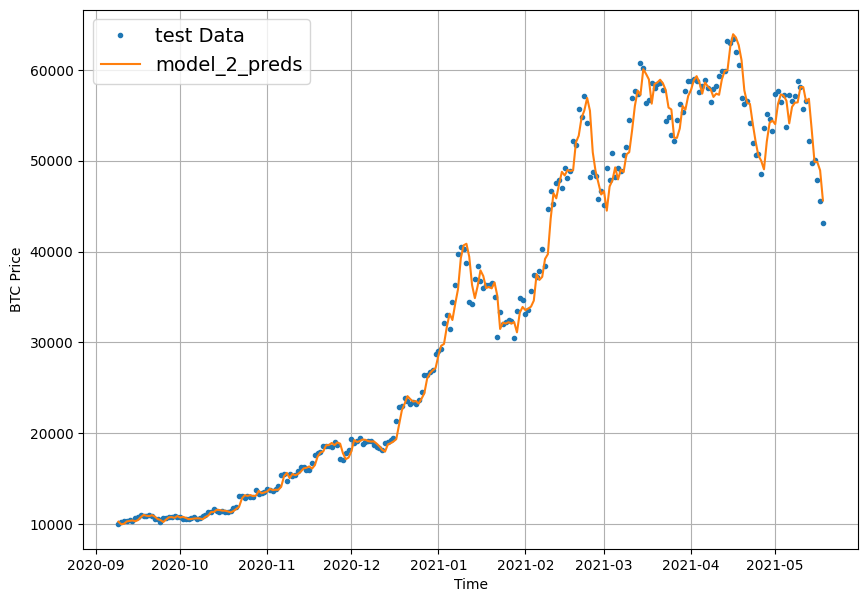

In [69]:
# Plotting model 1 prediction
offset=300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into  test_labels into ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="test Data")
plot_time_series(
                 timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format="-",
                 label="model_2_preds"
     
)

## Model 3 : Dense (window =30, horizon=7)

In [70]:
HORIZON=7
WINDOW_SIZE=30
#Make windowed data with appropriate horizon and window series
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [71]:
# Make train and testing windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                           labels=full_labels,
                                                                           test_split=0.2
                                                                           )
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [72]:
tf.random.set_seed(42)
#Create model
model_3=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_Dense")

#Compile
model_3.compile(loss="mae",
                optimizer="Adam",
                 metrics=["mae","mse"]
                )


In [73]:
model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)]
            )

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2030.7859 - mae: 2030.7859 - mse: 16304352.0000 

18/18 [==============================] - 2s 42ms/step - loss: 2016.0116 - mae: 2016.0116 - mse: 16142286.0000 - val_loss: 2967.0591 - val_mae: 2967.0591 - val_mse: 22502628.0000
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 601.7574 - mae: 601.7574 - mse: 1508997.1250

18/18 [==============================] - 1s 33ms/step - loss: 601.7574 - mae: 601.7574 - mse: 1508997.1250 - val_loss: 2923.6194 - val_mae: 2923.6194 - val_mse: 22382178.0000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 452.5798 - mae: 452.5798 - mse: 955587.3750

18/18 [==============================] - 1s 33ms/step - loss: 450.9809 - mae: 450.9809 - mse: 948365.4375 - val_loss: 2291.9204 - val_mae: 2291.9204 - val_mse: 14986597.0000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 413.2664 - mae: 413.2664 - mse: 818230.2500 

18/18 [==============================] - 1s 34ms/step - loss: 412.4063 - mae: 412.4063 - mse: 813800.6875 - val_loss: 2115.4880 - val_mae: 2115.4880 - val_mse: 13182461.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 378.2054 - mae: 378.2054 - mse: 703981.8750 - val_loss: 2126.3167 - val_mae: 2126.3167 - val_mse: 13048131.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 356.8590 - mae: 356.8590 - mse: 614203.6250

18/18 [==============================] - 1s 33ms/step - loss: 356.8590 - mae: 356.8590 - mse: 614203.6250 - val_loss: 1825.2404 - val_mae: 1825.2404 - val_mse: 10248623.0000
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 336.6870 - mae: 336.6870 - mse: 571767.6250

18/18 [==============================] - 1s 33ms/step - loss: 331.0299 - mae: 331.0299 - mse: 534739.3125 - val_loss: 1623.4938 - val_mae: 1623.4938 - val_mse: 8400983.0000
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 317.4706 - mae: 317.4706 - mse: 485580.0000

18/18 [==============================] - 1s 34ms/step - loss: 319.2643 - mae: 319.2643 - mse: 491134.3125 - val_loss: 1593.2634 - val_mae: 1593.2634 - val_mse: 8009626.5000
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 307.5583 - mae: 307.5583 - mse: 458251.3125 - val_loss: 1755.4578 - val_mae: 1755.4578 - val_mse: 9045983.0000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 303.2435 - mae: 303.2435 - mse: 429198.5312

18/18 [==============================] - 1s 50ms/step - loss: 305.1989 - mae: 305.1989 - mse: 436992.0938 - val_loss: 1510.6257 - val_mae: 1510.6257 - val_mse: 7249884.5000
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 284.8781 - mae: 284.8781 - mse: 398456.3438

18/18 [==============================] - 1s 34ms/step - loss: 286.3952 - mae: 286.3952 - mse: 403686.7812 - val_loss: 1471.7670 - val_mae: 1471.7670 - val_mse: 7005364.0000
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 281.3438 - mae: 281.3438 - mse: 394364.3438 - val_loss: 1579.4708 - val_mae: 1579.4708 - val_mse: 7765467.0000
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 277.9600 - mae: 277.9600 - mse: 382128.7500 - val_loss: 1472.2346 - val_mae: 1472.2346 - val_mse: 7029683.5000
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 271.5582 - mae: 271.5582 - mse: 369100.4062

18/18 [==============================] - 1s 34ms/step - loss: 271.5582 - mae: 271.5582 - mse: 369100.4062 - val_loss: 1448.3246 - val_mae: 1448.3246 - val_mse: 6843006.5000
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 270.5178 - mae: 270.5178 - mse: 368129.2188 - val_loss: 1596.7668 - val_mae: 1596.7668 - val_mse: 7588211.5000
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 267.2743 - mae: 267.2743 - mse: 357814.1875 - val_loss: 1448.3550 - val_mae: 1448.3550 - val_mse: 6779701.0000
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 265.0606 - mae: 265.0606 - mse: 356332.3750 - val_loss: 1561.8340 - val_mae: 1561.8340 - val_mse: 7568995.5000
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 265.6559 - mae: 265.6559 - mse: 353205.5000 - val_loss: 1518.2266 - val_mae: 1518.2266 - val_mse: 7096879.0000
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 262.4458 - ma

18/18 [==============================] - 1s 45ms/step - loss: 260.2957 - mae: 260.2957 - mse: 339947.9688 - val_loss: 1420.8108 - val_mae: 1420.8108 - val_mse: 6582591.5000
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 261.0689 - mae: 261.0689 - mse: 352520.7500

18/18 [==============================] - 1s 51ms/step - loss: 258.6631 - mae: 258.6631 - mse: 336051.2500 - val_loss: 1419.0009 - val_mae: 1419.0009 - val_mse: 6588024.0000
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 276.2585 - mae: 276.2585 - mse: 371791.7188

18/18 [==============================] - 1s 47ms/step - loss: 274.0382 - mae: 274.0382 - mse: 364595.2812 - val_loss: 1388.9115 - val_mae: 1388.9115 - val_mse: 6384200.5000
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 257.6869 - mae: 257.6869 - mse: 332696.1875 - val_loss: 1595.5991 - val_mae: 1595.5991 - val_mse: 7569023.5000
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 258.1107 - mae: 258.1107 - mse: 329909.3438 - val_loss: 1447.3267 - val_mae: 1447.3267 - val_mse: 6754337.5000
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 252.1738 - mae: 252.1738 - mse: 326595.5312 - val_loss: 1439.8435 - val_mae: 1439.8435 - val_mse: 6606853.0000
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 252.8209 - mae: 252.8209 - mse: 322391.9688 - val_loss: 1481.6460 - val_mae: 1481.6460 - val_mse: 6797717.0000
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 255.1370 - ma

18/18 [==============================] - 1s 32ms/step - loss: 249.0424 - mae: 249.0424 - mse: 318672.9688 - val_loss: 1381.2550 - val_mae: 1381.2550 - val_mse: 6454983.5000
Epoch 33/100
13/18 [====================>.........] - ETA: 0s - loss: 252.6906 - mae: 252.6906 - mse: 309228.6875

18/18 [==============================] - 1s 33ms/step - loss: 255.1107 - mae: 255.1107 - mse: 325298.8125 - val_loss: 1362.1947 - val_mae: 1362.1947 - val_mse: 6194358.5000
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 250.2125 - mae: 250.2125 - mse: 318331.0000 - val_loss: 1420.6890 - val_mae: 1420.6890 - val_mse: 6537334.0000
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 248.8782 - mae: 248.8782 - mse: 315357.3125 - val_loss: 1430.2870 - val_mae: 1430.2870 - val_mse: 6592417.0000
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 246.3524 - mae: 246.3524 - mse: 314102.9688 - val_loss: 1398.6239 - val_mae: 1398.6239 - val_mse: 6532092.5000
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 259.8774 - mae: 259.8774 - mse: 333582.2812 - val_loss: 1382.0283 - val_mae: 1382.0283 - val_mse: 6361900.5000
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 244.4728 - ma

18/18 [==============================] - 1s 32ms/step - loss: 246.0599 - mae: 246.0599 - mse: 312338.0312 - val_loss: 1340.5959 - val_mae: 1340.5959 - val_mse: 6145710.5000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 241.9842 - mae: 241.9842 - mse: 302093.6250 - val_loss: 1352.7445 - val_mae: 1352.7445 - val_mse: 6168312.5000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 244.1912 - mae: 244.1912 - mse: 306832.6875 - val_loss: 1369.9103 - val_mae: 1369.9103 - val_mse: 6273146.0000
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 241.0051 - mae: 241.0051 - mse: 299715.8125 - val_loss: 1512.7986 - val_mae: 1512.7986 - val_mse: 6907897.5000
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 245.4607 - mae: 245.4607 - mse: 306988.0000 - val_loss: 1360.2246 - val_mae: 1360.2246 - val_mse: 6200572.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 240.8644 - ma

18/18 [==============================] - 1s 33ms/step - loss: 243.5989 - mae: 243.5989 - mse: 301901.2188 - val_loss: 1328.7280 - val_mae: 1328.7280 - val_mse: 6030815.0000
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 250.0142 - mae: 250.0142 - mse: 307742.2500 - val_loss: 1477.8096 - val_mae: 1477.8096 - val_mse: 7029930.0000
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 241.9372 - mae: 241.9372 - mse: 299452.1250 - val_loss: 1360.1136 - val_mae: 1360.1136 - val_mse: 6121414.5000
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 235.8040 - mae: 235.8040 - mse: 290863.4688 - val_loss: 1494.0764 - val_mae: 1494.0764 - val_mse: 6830475.5000
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 239.1163 - mae: 239.1163 - mse: 294484.1875 - val_loss: 1354.1399 - val_mae: 1354.1399 - val_mse: 6112403.5000
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 237.0773 - mae: 2

18/18 [==============================] - 1s 32ms/step - loss: 237.0773 - mae: 237.0773 - mse: 293567.1250 - val_loss: 1315.1899 - val_mae: 1315.1899 - val_mse: 5934582.0000
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 241.1930 - mae: 241.1930 - mse: 298676.5938 - val_loss: 1328.4813 - val_mae: 1328.4813 - val_mse: 5996557.5000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 238.2590 - mae: 238.2590 - mse: 289987.6875 - val_loss: 1366.0721 - val_mae: 1366.0721 - val_mse: 6220040.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 240.7834 - mae: 240.7834 - mse: 298823.6875 - val_loss: 1331.5994 - val_mae: 1331.5994 - val_mse: 5987640.0000
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 239.0755 - mae: 239.0755 - mse: 294106.7812 - val_loss: 1393.8424 - val_mae: 1393.8424 - val_mse: 6348893.5000
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 235.9138 - mae: 2

18/18 [==============================] - 1s 32ms/step - loss: 235.9138 - mae: 235.9138 - mse: 285942.0938 - val_loss: 1308.1451 - val_mae: 1308.1451 - val_mse: 5897614.0000
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 234.2029 - mae: 234.2029 - mse: 290561.7812 - val_loss: 1354.6316 - val_mae: 1354.6316 - val_mse: 6172003.0000
Epoch 60/100
18/18 [==============================] - ETA: 0s - loss: 232.6247 - mae: 232.6247 - mse: 284085.3750

18/18 [==============================] - 1s 33ms/step - loss: 232.6247 - mae: 232.6247 - mse: 284085.3750 - val_loss: 1298.9729 - val_mae: 1298.9729 - val_mse: 5918337.0000
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 231.9023 - mae: 231.9023 - mse: 285183.0312 - val_loss: 1386.9878 - val_mae: 1386.9878 - val_mse: 6220050.0000
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 235.9762 - mae: 235.9762 - mse: 288073.2500 - val_loss: 1303.2162 - val_mae: 1303.2162 - val_mse: 6002733.5000
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 235.5102 - mae: 235.5102 - mse: 288742.5000 - val_loss: 1387.7206 - val_mae: 1387.7206 - val_mse: 6241500.0000
Epoch 64/100
17/18 [===========================>..] - ETA: 0s - loss: 234.5880 - mae: 234.5880 - mse: 286680.6875

18/18 [==============================] - 1s 33ms/step - loss: 234.0877 - mae: 234.0877 - mse: 285084.0625 - val_loss: 1291.6890 - val_mae: 1291.6890 - val_mse: 5777184.5000
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 233.5264 - mae: 233.5264 - mse: 287579.6875 - val_loss: 1333.9685 - val_mae: 1333.9685 - val_mse: 5995784.5000
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 234.3605 - mae: 234.3605 - mse: 289268.5312 - val_loss: 1703.8105 - val_mae: 1703.8105 - val_mse: 8109914.5000
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 251.1133 - mae: 251.1133 - mse: 308474.6875 - val_loss: 1393.8616 - val_mae: 1393.8616 - val_mse: 6145243.5000
Epoch 68/100
18/18 [==============================] - ETA: 0s - loss: 235.6860 - mae: 235.6860 - mse: 285310.5000

18/18 [==============================] - 1s 34ms/step - loss: 235.6860 - mae: 235.6860 - mse: 285310.5000 - val_loss: 1289.4183 - val_mae: 1289.4183 - val_mse: 5758736.5000
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 230.7402 - mae: 230.7402 - mse: 272581.0312 - val_loss: 1699.9683 - val_mae: 1699.9683 - val_mse: 8422668.0000
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 240.2404 - mae: 240.2404 - mse: 293539.8125 - val_loss: 1349.2736 - val_mae: 1349.2736 - val_mse: 6029751.5000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 233.7080 - mae: 233.7080 - mse: 286396.9062 - val_loss: 1289.8519 - val_mae: 1289.8519 - val_mse: 5732953.5000
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 231.3754 - mae: 231.3754 - mse: 279493.3438 - val_loss: 1296.1315 - val_mae: 1296.1315 - val_mse: 5845870.0000
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 229.9780 - mae: 2

18/18 [==============================] - 1s 35ms/step - loss: 229.5374 - mae: 229.5374 - mse: 277706.5625 - val_loss: 1286.8292 - val_mae: 1286.8292 - val_mse: 5786207.5000
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 231.9170 - mae: 231.9170 - mse: 284152.0938 - val_loss: 1396.3051 - val_mae: 1396.3051 - val_mse: 6218917.0000
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 234.1197 - mae: 234.1197 - mse: 281806.8125 - val_loss: 1547.7611 - val_mae: 1547.7611 - val_mse: 6933475.0000
Epoch 76/100
18/18 [==============================] - 0s 9ms/step - loss: 234.3111 - mae: 234.3111 - mse: 285547.7188 - val_loss: 1308.0165 - val_mae: 1308.0165 - val_mse: 5868937.0000
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 231.1554 - mae: 231.1554 - mse: 281284.1250 - val_loss: 1290.6755 - val_mae: 1290.6755 - val_mse: 5789742.5000
Epoch 78/100
18/18 [==============================] - 1s 28ms/step - loss: 229.9674 - m

18/18 [==============================] - 2s 99ms/step - loss: 228.4311 - mae: 228.4311 - mse: 276261.4688 - val_loss: 1285.8575 - val_mae: 1285.8575 - val_mse: 5841284.0000
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 228.1440 - mae: 228.1440 - mse: 274843.9688 - val_loss: 1323.3899 - val_mae: 1323.3899 - val_mse: 5894510.0000
Epoch 83/100
18/18 [==============================] - 0s 18ms/step - loss: 230.6213 - mae: 230.6213 - mse: 279230.1250 - val_loss: 1417.1599 - val_mae: 1417.1599 - val_mse: 6482015.5000
Epoch 84/100
18/18 [==============================] - 0s 19ms/step - loss: 229.3207 - mae: 229.3207 - mse: 278096.9375 - val_loss: 1290.7893 - val_mae: 1290.7893 - val_mse: 5776557.0000
Epoch 85/100
18/18 [==============================] - 0s 14ms/step - loss: 228.9673 - mae: 228.9673 - mse: 276166.6875 - val_loss: 1313.8110 - val_mae: 1313.8110 - val_mse: 5828745.5000
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 228.0957 -

18/18 [==============================] - 1s 32ms/step - loss: 227.5329 - mae: 227.5329 - mse: 270906.0625 - val_loss: 1271.9971 - val_mae: 1271.9971 - val_mse: 5837416.0000
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 230.7285 - mae: 230.7285 - mse: 278304.1875 - val_loss: 1382.4509 - val_mae: 1382.4509 - val_mse: 6079682.5000
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 229.1335 - mae: 229.1335 - mse: 274022.6562 - val_loss: 1373.3488 - val_mae: 1373.3488 - val_mse: 6063825.5000
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 231.7496 - mae: 231.7496 - mse: 275272.0938 - val_loss: 1373.6847 - val_mae: 1373.6847 - val_mse: 6132636.5000
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 234.4681 - mae: 234.4681 - mse: 283014.8438 - val_loss: 1365.3246 - val_mae: 1365.3246 - val_mse: 6028050.0000
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 238.1370 - ma

In [74]:
#Evaluate
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1531.2474 - mae: 1531.2474 - mse: 6878927.0000


[1531.2474365234375, 1531.2474365234375, 6878927.0]

In [75]:
#Load in best performing model
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_Dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1271.9971 - mae: 1271.9971 - mse: 5837415.5000


[1271.9970703125, 1271.9970703125, 5837415.5]

In [76]:
# Getb forecaset predictions
model_3_preds=make_preds(model_3,
                         input_data=test_windows)
model_3_preds.shape

18/18 [==============================] - 0s 2ms/step


TensorShape([551, 7])

In [77]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds
                               )
model_3_results

{'mae': array([  892.3942  ,   506.56207 ,   433.63113 ,   525.9526  ,
          486.46637 ,   526.6337  ,   472.68793 ,   575.8688  ,
          696.7173  ,   688.7525  ,   816.8657  ,   735.63086 ,
          805.8784  ,   864.7876  ,   584.06775 ,   288.7998  ,
          130.81187 ,   204.14272 ,   212.7318  ,   284.09174 ,
          227.7461  ,   232.13875 ,   289.76666 ,   344.83978 ,
          220.72385 ,   142.32072 ,   150.30846 ,   173.2634  ,
          206.94803 ,   283.11816 ,   285.01498 ,   471.0715  ,
          405.29752 ,   465.9774  ,   346.39078 ,   329.74658 ,
          338.67438 ,   243.53432 ,   290.76855 ,   150.23277 ,
          369.8597  ,   102.09277 ,   127.95173 ,   101.191475,
          162.18478 ,    95.15716 ,   157.95389 ,    89.186035,
          145.8102  ,   174.0595  ,   169.07875 ,   213.26375 ,
          285.2145  ,   187.57101 ,   206.54883 ,   268.1649  ,
          482.11783 ,   409.50586 ,   490.89633 ,   525.9374  ,
          319.58783 ,   208.45619

## Making evaluation function work for larger horizon

In [78]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  #make sure float 32 datatype (for metric calculations)
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  #Calculate various evaluation metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)
  
  #Account for different size metrics(for longer horizons, we want to reduce metrics to single value )
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)


  return{ "mae":mae.numpy(),
         "mape":mape.numpy(),
         "mase":mase.numpy(),
         "mse":mse.numpy(),
         "rmse":rmse.numpy()
          
  }

In [79]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds
                               )
model_3_results

{'mae': 1271.9971,
 'mape': 5.714693,
 'mase': 2.2634478,
 'mse': 5837415.5,
 'rmse': 1457.8812}

In [80]:
model_2_results

{'mae': 596.0551,
 'mape': 2.6868737,
 'mase': 1.0419102,
 'mse': 1226987.8,
 'rmse': 1107.6948}

In [81]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

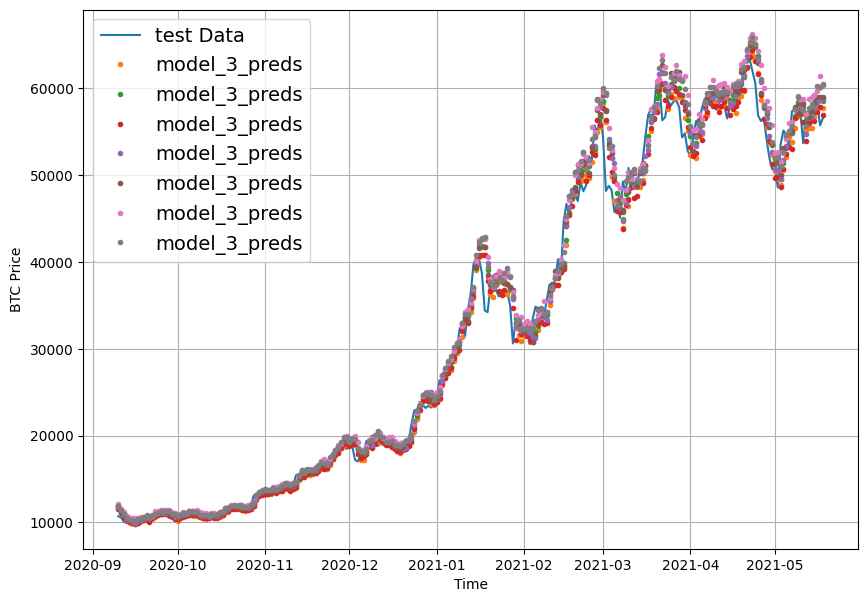

In [82]:
# Plotting model 3 prediction
offset=300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into  test_labels into ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 format="-",
                 start=offset,
                 label="test Data")
plot_time_series(
                 timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label="model_3_preds"
     
)

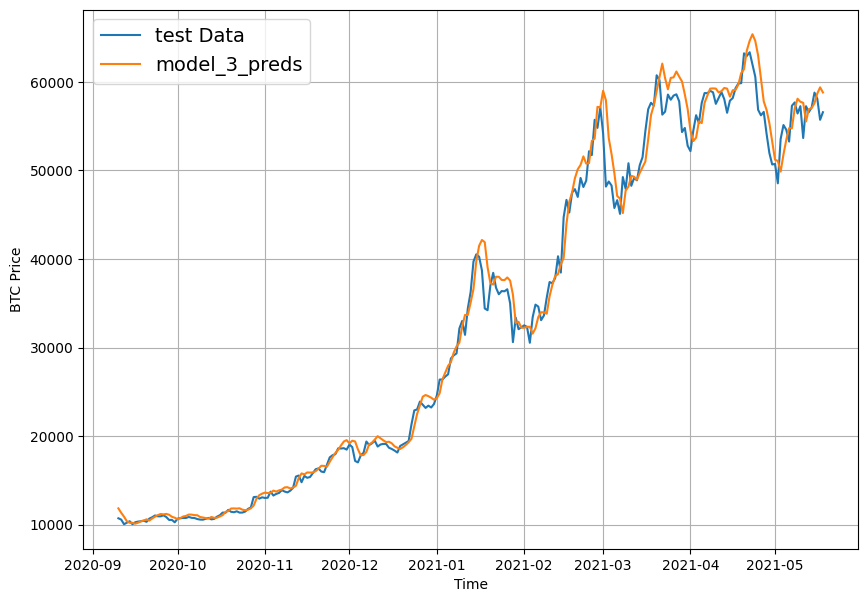

In [83]:
# Plotting model 3 prediction
offset=300
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into  test_labels into ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 format="-",
                 start=offset,
                 label="test Data")
plot_time_series(
                 timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format="-",
                 label="model_3_preds"
     
)

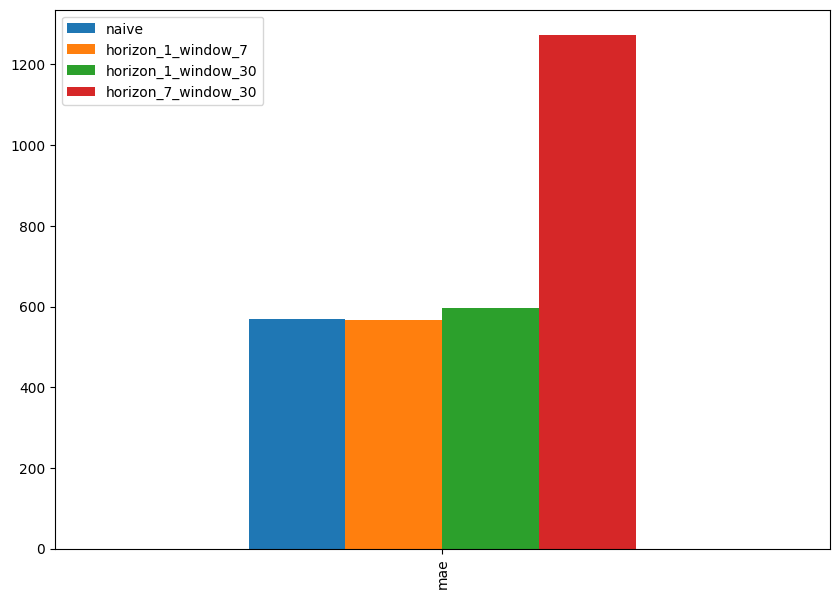

In [84]:

pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4 : Conv1D

In [85]:
HORIZON=1
WINDOW_SIZE=7

In [86]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [87]:
# Create train/test sets
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

 We need input shape of (batch_size,timesteps,input_dim)
however our data isn't in that shape yet

In [88]:
# Check data input shape 
train_windows[0].shape

(7,)

In [89]:
# Before we pass our data to Con1D layer, we have to reshape it in order to make things works
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [90]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))# add extra dimension 

In [91]:
# Test out lambda layer
print(f"Original shape:{x.shape}")# Window size
print(f"Expand shape:{expand_dims_layer(x).shape}")

Original shape:(7,)
Expand shape:(7, 1)


In [92]:
tf.random.set_seed(42)

#Create 1D layer
model_4=tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON) 
],name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]
                )

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 1875.7474 - mae: 1875.7474 - mse: 9368160.0000   

18/18 [==============================] - 6s 60ms/step - loss: 1656.3657 - mae: 1656.3657 - mse: 7845773.0000 - val_loss: 2023.8536 - val_mae: 2023.8536 - val_mse: 9705415.0000
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 303.7794 - mae: 303.7794 - mse: 384528.0000

18/18 [==============================] - 1s 46ms/step - loss: 288.0087 - mae: 288.0087 - mse: 353132.4062 - val_loss: 1436.4354 - val_mae: 1436.4354 - val_mse: 5460031.5000
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 220.8593 - mae: 220.8593 - mse: 240395.8750

18/18 [==============================] - 1s 44ms/step - loss: 218.3687 - mae: 218.3687 - mse: 238567.2031 - val_loss: 1150.7048 - val_mae: 1150.7048 - val_mse: 4125833.2500
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 200.6903 - mae: 200.6903 - mse: 206432.6875

18/18 [==============================] - 1s 45ms/step - loss: 201.9814 - mae: 201.9814 - mse: 206521.0000 - val_loss: 1087.3839 - val_mae: 1087.3839 - val_mse: 3965209.7500
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 205.0005 - mae: 205.0005 - mse: 221809.5469

18/18 [==============================] - 1s 48ms/step - loss: 194.7953 - mae: 194.7953 - mse: 197784.8281 - val_loss: 1087.2411 - val_mae: 1087.2411 - val_mse: 3827981.2500
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 189.6734 - mae: 189.6734 - mse: 180039.8594

18/18 [==============================] - 1s 64ms/step - loss: 191.3694 - mae: 191.3694 - mse: 192526.5625 - val_loss: 1073.6034 - val_mae: 1073.6034 - val_mse: 3878718.5000
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 198.2290 - mae: 198.2290 - mse: 210364.6562

18/18 [==============================] - 1s 46ms/step - loss: 191.2166 - mae: 191.2166 - mse: 191947.3594 - val_loss: 1040.9011 - val_mae: 1040.9011 - val_mse: 3646169.2500
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 181.4471 - mae: 181.4471 - mse: 173943.9531

18/18 [==============================] - 1s 44ms/step - loss: 184.8727 - mae: 184.8727 - mse: 181843.9062 - val_loss: 1040.1700 - val_mae: 1040.1700 - val_mse: 3513166.7500
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 182.2678 - mae: 182.2678 - mse: 176865.3906 - val_loss: 1049.2799 - val_mae: 1049.2799 - val_mse: 3464356.7500
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 173.6384 - mae: 173.6384 - mse: 154542.1875

18/18 [==============================] - 1s 47ms/step - loss: 179.2238 - mae: 179.2238 - mse: 171980.4844 - val_loss: 996.5137 - val_mae: 996.5137 - val_mse: 3274416.0000
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 174.4456 - mae: 174.4456 - mse: 164561.8281

18/18 [==============================] - 1s 55ms/step - loss: 176.0094 - mae: 176.0094 - mse: 165248.5312 - val_loss: 972.0461 - val_mae: 972.0461 - val_mse: 3189751.0000
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 175.7012 - mae: 175.7012 - mse: 162035.6875 - val_loss: 1005.0096 - val_mae: 1005.0096 - val_mse: 3141479.0000
Epoch 13/100
18/18 [==============================] - 0s 12ms/step - loss: 171.3487 - mae: 171.3487 - mse: 154709.3750 - val_loss: 1003.2660 - val_mae: 1003.2660 - val_mse: 3076184.7500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 163.6709 - mae: 163.6709 - mse: 143523.5156

18/18 [==============================] - 1s 69ms/step - loss: 166.6237 - mae: 166.6237 - mse: 148985.6094 - val_loss: 937.7725 - val_mae: 937.7725 - val_mse: 2842907.7500
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 164.3293 - mae: 164.3293 - mse: 146654.6875 - val_loss: 963.1712 - val_mae: 963.1712 - val_mse: 2840734.0000
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 162.0580 - mae: 162.0580 - mse: 134692.0625

18/18 [==============================] - 1s 50ms/step - loss: 160.3055 - mae: 160.3055 - mse: 140746.0469 - val_loss: 887.1666 - val_mae: 887.1666 - val_mse: 2607484.5000
Epoch 17/100
18/18 [==============================] - 0s 7ms/step - loss: 156.3406 - mae: 156.3406 - mse: 134072.2500 - val_loss: 928.9583 - val_mae: 928.9583 - val_mse: 2632815.7500
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 161.0324 - mae: 161.0324 - mse: 139934.2344

18/18 [==============================] - 1s 45ms/step - loss: 154.0229 - mae: 154.0229 - mse: 130875.5234 - val_loss: 874.1770 - val_mae: 874.1770 - val_mse: 2442283.2500
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 149.6137 - mae: 149.6137 - mse: 124101.7578 - val_loss: 888.4381 - val_mae: 888.4381 - val_mse: 2423931.0000
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 150.6278 - mae: 150.6278 - mse: 126569.5156

18/18 [==============================] - 1s 45ms/step - loss: 149.3526 - mae: 149.3526 - mse: 123549.0469 - val_loss: 832.9121 - val_mae: 832.9121 - val_mse: 2346202.2500
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 147.1250 - mae: 147.1250 - mse: 115173.6562

18/18 [==============================] - 1s 45ms/step - loss: 147.3519 - mae: 147.3519 - mse: 120610.2344 - val_loss: 791.8207 - val_mae: 791.8207 - val_mse: 2130481.0000
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 143.3403 - mae: 143.3403 - mse: 113808.1250 - val_loss: 794.0573 - val_mae: 794.0573 - val_mse: 2064979.3750
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 137.5478 - mae: 137.5478 - mse: 103329.7578

18/18 [==============================] - 1s 46ms/step - loss: 139.2356 - mae: 139.2356 - mse: 109125.0469 - val_loss: 787.0503 - val_mae: 787.0502 - val_mse: 2006718.1250
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 139.0962 - mae: 139.0962 - mse: 107264.3750

18/18 [==============================] - 1s 64ms/step - loss: 139.4326 - mae: 139.4326 - mse: 106830.2266 - val_loss: 774.4701 - val_mae: 774.4701 - val_mse: 1941748.0000
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 140.0529 - mae: 140.0529 - mse: 110363.0469

18/18 [==============================] - 1s 46ms/step - loss: 136.5764 - mae: 136.5764 - mse: 104674.9844 - val_loss: 742.9701 - val_mae: 742.9701 - val_mse: 1846354.6250
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 134.8817 - mae: 134.8817 - mse: 97845.8516

18/18 [==============================] - 1s 45ms/step - loss: 133.3136 - mae: 133.3136 - mse: 100299.4688 - val_loss: 730.3922 - val_mae: 730.3922 - val_mse: 1819124.2500
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 136.3494 - mae: 136.3494 - mse: 106891.4453

18/18 [==============================] - 1s 47ms/step - loss: 132.0604 - mae: 132.0604 - mse: 99623.7734 - val_loss: 724.1841 - val_mae: 724.1841 - val_mse: 1792186.5000
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 127.1486 - mae: 127.1486 - mse: 94386.2656

18/18 [==============================] - 1s 45ms/step - loss: 129.5242 - mae: 129.5242 - mse: 95173.8906 - val_loss: 708.2925 - val_mae: 708.2925 - val_mse: 1696397.3750
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 129.5042 - mae: 129.5042 - mse: 95868.1094

18/18 [==============================] - 1s 45ms/step - loss: 128.4931 - mae: 128.4931 - mse: 94319.6094 - val_loss: 701.7030 - val_mae: 701.7030 - val_mse: 1647313.2500
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 129.9921 - mae: 129.9921 - mse: 93403.2656 - val_loss: 760.5928 - val_mae: 760.5928 - val_mse: 1777388.6250
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 135.0561 - mae: 135.0561 - mse: 96160.4062 - val_loss: 855.8864 - val_mae: 855.8864 - val_mse: 2060976.1250
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 132.7142 - mae: 132.7142 - mse: 90039.3672

18/18 [==============================] - 1s 55ms/step - loss: 134.3870 - mae: 134.3870 - mse: 93779.3828 - val_loss: 698.1149 - val_mae: 698.1149 - val_mse: 1594013.3750
Epoch 33/100
11/18 [=================>............] - ETA: 0s - loss: 132.0847 - mae: 132.0847 - mse: 91618.9375 

18/18 [==============================] - 1s 71ms/step - loss: 130.5181 - mae: 130.5181 - mse: 87716.5391 - val_loss: 695.6550 - val_mae: 695.6550 - val_mse: 1648347.5000
Epoch 34/100
10/18 [===============>..............] - ETA: 0s - loss: 127.5838 - mae: 127.5838 - mse: 95653.5547 

18/18 [==============================] - 1s 60ms/step - loss: 124.6734 - mae: 124.6734 - mse: 88572.9375 - val_loss: 668.5047 - val_mae: 668.5047 - val_mse: 1549407.7500
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 124.9320 - mae: 124.9320 - mse: 93910.9531

18/18 [==============================] - 1s 45ms/step - loss: 122.2368 - mae: 122.2368 - mse: 87709.7109 - val_loss: 667.0036 - val_mae: 667.0036 - val_mse: 1495882.8750
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 125.5355 - mae: 125.5355 - mse: 88399.3203 - val_loss: 697.8521 - val_mae: 697.8521 - val_mse: 1560822.3750
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 123.4643 - mae: 123.4643 - mse: 85828.6719 

18/18 [==============================] - 1s 46ms/step - loss: 121.3912 - mae: 121.3912 - mse: 84842.4062 - val_loss: 651.2949 - val_mae: 651.2949 - val_mse: 1474319.2500
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 121.4712 - mae: 121.4712 - mse: 86919.9219

18/18 [==============================] - 1s 44ms/step - loss: 120.3337 - mae: 120.3337 - mse: 85653.9531 - val_loss: 645.3748 - val_mae: 645.3748 - val_mse: 1442248.0000
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 119.9587 - mae: 119.9587 - mse: 83823.5938 - val_loss: 674.8606 - val_mae: 674.8606 - val_mse: 1547679.2500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 118.8446 - mae: 118.8446 - mse: 84262.7422 - val_loss: 652.2155 - val_mae: 652.2155 - val_mse: 1429347.6250
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 120.6577 - mae: 120.6577 - mse: 86814.3047

18/18 [==============================] - 1s 67ms/step - loss: 118.6634 - mae: 118.6634 - mse: 83686.3203 - val_loss: 633.8714 - val_mae: 633.8714 - val_mse: 1396492.7500
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 118.1267 - mae: 118.1267 - mse: 81791.4062

18/18 [==============================] - 1s 46ms/step - loss: 120.9207 - mae: 120.9207 - mse: 85939.6641 - val_loss: 632.4528 - val_mae: 632.4528 - val_mse: 1382844.5000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2586 - mae: 116.2586 - mse: 79994.7500 - val_loss: 638.7748 - val_mae: 638.7748 - val_mse: 1420159.7500
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 117.3336 - mae: 117.3336 - mse: 80523.5469 - val_loss: 634.7587 - val_mae: 634.7587 - val_mse: 1405053.3750
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5726 - mae: 117.5726 - mse: 81903.6719 - val_loss: 636.0526 - val_mae: 636.0526 - val_mse: 1375859.1250
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 121.9292 - mae: 121.9292 - mse: 92529.6484

18/18 [==============================] - 1s 45ms/step - loss: 116.7211 - mae: 116.7211 - mse: 80198.3203 - val_loss: 622.3546 - val_mae: 622.3546 - val_mse: 1361318.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 118.7325 - mae: 118.7325 - mse: 82413.3516 - val_loss: 655.5759 - val_mae: 655.5759 - val_mse: 1414784.2500
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3462 - mae: 115.3462 - mse: 78735.7031 - val_loss: 638.3575 - val_mae: 638.3575 - val_mse: 1374569.5000
Epoch 49/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8009 - mae: 115.8009 - mse: 82355.2656 

18/18 [==============================] - 1s 45ms/step - loss: 116.0671 - mae: 116.0671 - mse: 79022.4844 - val_loss: 621.6417 - val_mae: 621.6417 - val_mse: 1333844.5000
Epoch 50/100
15/18 [========================>.....] - ETA: 0s - loss: 113.3054 - mae: 113.3054 - mse: 76565.6953 

18/18 [==============================] - 1s 45ms/step - loss: 115.0401 - mae: 115.0401 - mse: 78564.4531 - val_loss: 619.1298 - val_mae: 619.1298 - val_mse: 1325057.6250
Epoch 51/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6120 - mae: 114.6120 - mse: 79521.6016

18/18 [==============================] - 1s 45ms/step - loss: 114.2483 - mae: 114.2483 - mse: 77296.4609 - val_loss: 615.6921 - val_mae: 615.6921 - val_mse: 1317166.1250
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3016 - mae: 114.3016 - mse: 79001.1953 - val_loss: 629.4407 - val_mae: 629.4407 - val_mse: 1376797.8750
Epoch 53/100
13/18 [====================>.........] - ETA: 0s - loss: 115.2678 - mae: 115.2678 - mse: 76830.8906

18/18 [==============================] - 1s 47ms/step - loss: 116.8066 - mae: 116.8066 - mse: 79156.8750 - val_loss: 615.1454 - val_mae: 615.1454 - val_mse: 1310396.5000
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2496 - mae: 118.2496 - mse: 80327.8203 - val_loss: 663.2704 - val_mae: 663.2704 - val_mse: 1416485.2500
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0501 - mae: 117.0501 - mse: 78647.7344 - val_loss: 616.5297 - val_mae: 616.5297 - val_mse: 1337078.6250
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 116.6516 - mae: 116.6516 - mse: 79635.1016 - val_loss: 798.0583 - val_mae: 798.0583 - val_mse: 1902778.3750
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 138.1365 - mae: 138.1365 - mse: 94934.5000 

18/18 [==============================] - 1s 68ms/step - loss: 138.1365 - mae: 138.1365 - mse: 94934.5000 - val_loss: 605.4459 - val_mae: 605.4459 - val_mse: 1295151.6250
Epoch 58/100
18/18 [==============================] - 0s 12ms/step - loss: 116.0124 - mae: 116.0124 - mse: 79214.8438 - val_loss: 636.6896 - val_mae: 636.6896 - val_mse: 1391214.0000
Epoch 59/100
18/18 [==============================] - 0s 9ms/step - loss: 112.1515 - mae: 112.1515 - mse: 75552.4688 - val_loss: 606.8935 - val_mae: 606.8935 - val_mse: 1305151.0000
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 112.2691 - mae: 112.2691 - mse: 76445.8594 - val_loss: 625.0178 - val_mae: 625.0178 - val_mse: 1319290.7500
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 112.4223 - mae: 112.4223 - mse: 76828.7188 - val_loss: 623.0026 - val_mae: 623.0026 - val_mse: 1314435.6250
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 112.1164 - mae: 112.1164 - ms

18/18 [==============================] - 1s 57ms/step - loss: 112.1164 - mae: 112.1164 - mse: 73810.9531 - val_loss: 601.6581 - val_mae: 601.6581 - val_mse: 1273854.7500
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9212 - mae: 111.9212 - mse: 75035.4141 - val_loss: 617.1445 - val_mae: 617.1445 - val_mse: 1298215.1250
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8510 - mae: 111.8510 - mse: 74858.0625 - val_loss: 635.2316 - val_mae: 635.2316 - val_mse: 1335328.2500
Epoch 65/100
15/18 [========================>.....] - ETA: 0s - loss: 111.6782 - mae: 111.6782 - mse: 75330.6406 

18/18 [==============================] - 1s 45ms/step - loss: 113.7484 - mae: 113.7484 - mse: 76005.7734 - val_loss: 594.2312 - val_mae: 594.2312 - val_mse: 1261591.7500
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5786 - mae: 113.5786 - mse: 75019.4531 - val_loss: 597.2221 - val_mae: 597.2221 - val_mse: 1271680.0000
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8737 - mae: 109.8737 - mse: 73219.4297 - val_loss: 640.7098 - val_mae: 640.7098 - val_mse: 1380180.2500
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 118.5922 - mae: 118.5922 - mse: 75364.9844 - val_loss: 714.7332 - val_mae: 714.7332 - val_mse: 1597683.2500
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 126.7032 - mae: 126.7032 - mse: 84951.3594 - val_loss: 638.1079 - val_mae: 638.1079 - val_mse: 1376620.3750
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 115.3916 - mae: 115.3916 - m

18/18 [==============================] - 1s 63ms/step - loss: 111.3044 - mae: 111.3044 - mse: 74184.3047 - val_loss: 592.0147 - val_mae: 592.0147 - val_mse: 1253004.3750
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 111.0272 - mae: 111.0272 - mse: 76789.0156 

18/18 [==============================] - 1s 46ms/step - loss: 111.5756 - mae: 111.5756 - mse: 74975.8750 - val_loss: 590.7557 - val_mae: 590.7557 - val_mse: 1248275.6250
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0923 - mae: 110.0923 - mse: 73658.0078 - val_loss: 590.8055 - val_mae: 590.8055 - val_mse: 1240631.8750
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4031 - mae: 110.4031 - mse: 73986.8516 - val_loss: 595.1005 - val_mae: 595.1005 - val_mse: 1259083.7500
Epoch 77/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9408 - mae: 116.9408 - mse: 80928.8672

18/18 [==============================] - 1s 46ms/step - loss: 111.9082 - mae: 111.9082 - mse: 72831.9766 - val_loss: 586.5002 - val_mae: 586.5002 - val_mse: 1233323.7500
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9131 - mae: 109.9131 - mse: 72670.3750 - val_loss: 587.3753 - val_mae: 587.3753 - val_mse: 1231594.8750
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3251 - mae: 111.3251 - mse: 75560.2266 - val_loss: 616.8037 - val_mae: 616.8037 - val_mse: 1306895.2500
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1913 - mae: 114.1913 - mse: 75494.1250 - val_loss: 590.1337 - val_mae: 590.1337 - val_mse: 1234439.6250
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4961 - mae: 112.4961 - mse: 73603.9688 - val_loss: 588.9426 - val_mae: 588.9426 - val_mse: 1242070.3750
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4624 - mae: 115.4624 - m

18/18 [==============================] - 1s 45ms/step - loss: 111.0282 - mae: 111.0282 - mse: 72028.3203 - val_loss: 583.6764 - val_mae: 583.6764 - val_mse: 1217777.3750
Epoch 88/100
14/18 [======================>.......] - ETA: 0s - loss: 113.1983 - mae: 113.1983 - mse: 79356.1250 

18/18 [==============================] - 1s 45ms/step - loss: 110.0913 - mae: 110.0913 - mse: 72989.2188 - val_loss: 581.7651 - val_mae: 581.7651 - val_mse: 1218263.5000
Epoch 89/100
15/18 [========================>.....] - ETA: 0s - loss: 105.7778 - mae: 105.7778 - mse: 64911.4727

18/18 [==============================] - 1s 46ms/step - loss: 112.3052 - mae: 112.3052 - mse: 71657.9141 - val_loss: 580.4659 - val_mae: 580.4659 - val_mse: 1211369.0000
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2618 - mae: 111.2618 - mse: 70811.5547 - val_loss: 765.2321 - val_mae: 765.2321 - val_mse: 1654528.8750
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0956 - mae: 113.0956 - mse: 75278.3828 - val_loss: 584.7263 - val_mae: 584.7263 - val_mse: 1225855.6250
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3905 - mae: 110.3905 - mse: 74176.4375 - val_loss: 583.3178 - val_mae: 583.3178 - val_mse: 1213923.0000
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3489 - mae: 113.3489 - mse: 75431.0469 - val_loss: 623.8165 - val_mae: 623.8165 - val_mse: 1312214.0000
Epoch 94/100
15/18 [========================>.....] - ETA: 0s - loss: 112.4478 - mae: 112.4478 - mse: 

18/18 [==============================] - 1s 45ms/step - loss: 109.4385 - mae: 109.4385 - mse: 73029.3438 - val_loss: 579.9805 - val_mae: 579.9805 - val_mse: 1212125.5000
Epoch 95/100
10/18 [===============>..............] - ETA: 0s - loss: 104.7448 - mae: 104.7448 - mse: 67152.7578 

18/18 [==============================] - 1s 65ms/step - loss: 108.5935 - mae: 108.5935 - mse: 72379.1484 - val_loss: 578.2599 - val_mae: 578.2599 - val_mse: 1203832.3750
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 113.6993 - mae: 113.6993 - mse: 73888.8516 - val_loss: 584.9288 - val_mae: 584.9288 - val_mse: 1224762.2500
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 110.0272 - mae: 110.0272 - mse: 72206.6328 - val_loss: 617.2695 - val_mae: 617.2695 - val_mse: 1293275.2500
Epoch 98/100
18/18 [==============================] - 0s 11ms/step - loss: 109.2011 - mae: 109.2011 - mse: 71779.5469 - val_loss: 579.9852 - val_mae: 579.9852 - val_mse: 1211515.1250
Epoch 99/100
18/18 [==============================] - 0s 12ms/step - loss: 108.7544 - mae: 108.7544 - mse: 72005.6797 - val_loss: 579.7086 - val_mae: 579.7086 - val_mse: 1203299.6250
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 110.8000 - mae: 110.800

In [93]:

model_4.summary()


Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 578.2600 - mae: 578.2600 - mse: 1203832.6250


[578.260009765625, 578.260009765625, 1203832.625]

In [95]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8882.285 , 8756.731 , 8974.319 , 8766.5625, 8707.676 , 8739.43  ,
       8658.057 , 8512.297 , 8446.492 , 8496.027 ], dtype=float32)>

In [96]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 578.25995,
 'mape': 2.6078093,
 'mase': 1.0158426,
 'mse': 1203832.5,
 'rmse': 1097.193}

## Model 5: RNN (LSTM)

In [97]:
inputs=layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
x=layers.LSTM(128,activation="relu")(x)
# x=layers.Dense(32,activation="relu")(X)
output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs=inputs,outputs=output,name="model_5_LSTM")

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]
                )

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 184ms/step - loss: 2692.4526 - mae: 2692.4526 - mse: 17807660.0000 - val_loss: 13055.8887 - val_mae: 13055.8887 - val_mse: 298791520.0000
Epoch 2/100
18/18 [==============================] - 2s 110ms/step - loss: 1318.3042 - mae: 1318.3042 - mse: 4775997.5000 - val_loss: 3302.9653 - val_mae: 3302.9653 - val_mse: 22013162.0000
Epoch 3/100
18/18 [==============================] - 2s 111ms/step - loss: 307.8890 - mae: 307.8890 - mse: 407943.9375 - val_loss: 1270.9469 - val_mae: 1270.9469 - val_mse: 5164913.5000
Epoch 4/100
18/18 [==============================] - 2s 111ms/step - loss: 216.7291 - mae: 216.7291 - mse: 228220.2500 - val_loss: 1114.7412 - val_mae: 1114.7412 - val_mse: 4010065.0000
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 198.5184 - mae: 198.5184 - mse: 204426.5781 - val_loss: 1139.2961 - val_mae: 1139.2961 - val_mse: 4061736.5000
Epoch 6/100
18/18 [==============================] - 2s 134

In [98]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 593.7795 - mae: 593.7795 - mse: 1256734.8750


[593.779541015625, 593.779541015625, 1256734.875]

In [99]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8931.591, 8780.633, 8957.298, 8796.666, 8697.443, 8725.577,
       8685.725, 8529.134, 8447.691, 8498.69 ], dtype=float32)>

In [100]:
model_5_preds.shape

TensorShape([556])

In [101]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 593.7796,
 'mape': 2.6888807,
 'mase': 1.0431063,
 'mse': 1256735.1,
 'rmse': 1121.042}

In [102]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [103]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

## Making a multivariate time series dataset

Adding bitcoin halving events

In [104]:
bitcoin_prices.head(),bitcoin_prices.tail()

(                Price
 Date                 
 2013-10-01  123.65499
 2013-10-02  125.45500
 2013-10-03  108.58483
 2013-10-04  118.67466
 2013-10-05  121.33866,
                    Price
 Date                    
 2021-05-14  49764.132082
 2021-05-15  50032.693137
 2021-05-16  47885.625255
 2021-05-17  45604.615754
 2021-05-18  43144.471291)

In [105]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [106]:
block_reward_2_datetime 

numpy.datetime64('2012-11-28')

In [107]:
bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [108]:
# Create date ranges of where specific block reward values should be
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [109]:
# Add in a block reward column 
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

#Add in block reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [110]:
bitcoin_prices_block.tail()

Price block_reward
Date                                 
2021-05-14  49764.132082         6.25
2021-05-15  50032.693137         6.25
2021-05-16  47885.625255         6.25
2021-05-17  45604.615754         6.25
2021-05-18  43144.471291         6.25

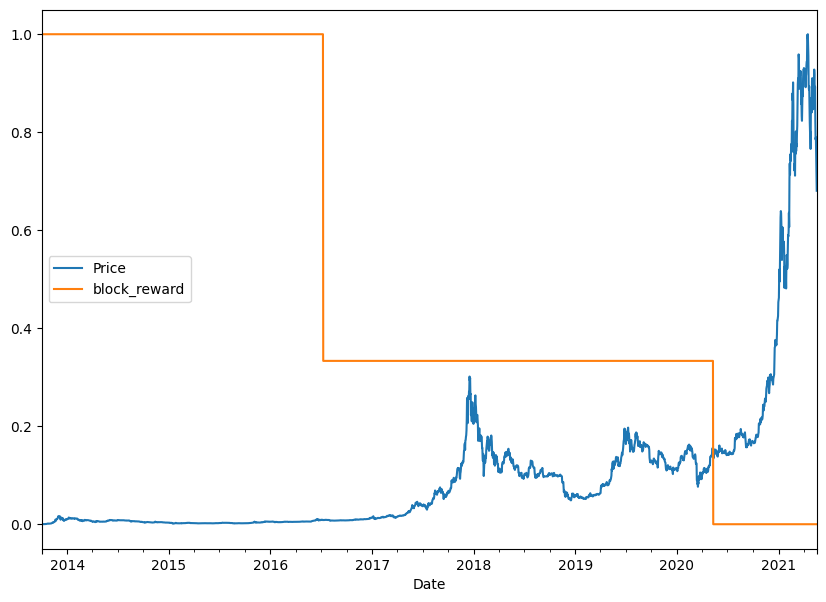

In [111]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index                                   
                                   )
scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas


In [112]:
# Setu up dataset parameters
HORIZON=1
WINDOW_SIZE=7


In [113]:
#Make a copy of bitcoin data with block reward feature
bitcoin_prices_windowed=bitcoin_prices_block.copy()

#Add windowed columns
for i in range(WINDOW_SIZE):#Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Prices+{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)  
  


Price block_reward   Prices+1   Prices+2   Prices+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   
2013-10-06  120.65533           25  121.33866  118.67466  108.58483   
2013-10-07  121.79500           25  120.65533  121.33866  118.67466   
2013-10-08  123.03300           25  121.79500  120.65533  121.33866   
2013-10-09  124.04900           25  123.03300  121.79500  120.65533   
2013-10-10  125.96116           25  124.04900  123.03300  121.79500   

             Prices+4   Prices+5   Prices+6   Prices+7  
Date                                                    
2013-10-01        NaN        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN        NaN  
2013-10-05  123.65499        NaN        NaN        NaN  
2013-10-06  125.45500  123.65499        NaN        NaN  
2013-10-07  108.58483  125.45500  123.65499        NaN  
2013-10-08  118.67466  108.58483  125.45500  123.65499  
2013-10-09  121.33866  118.67466  108.58483  125.45500  
2013-10-10  120.65533  121.33866  118.67466  108.58483

In [114]:
# Create X (windows) and y (horizon)
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

block_reward    Prices+1    Prices+2    Prices+3    Prices+4  \
Date                                                                       
2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   

              Prices+5    Prices+6    Prices+7  
Date                                            
2013-10-08  108.584831  125.455002  123.654991  
2013-10-09  118.674660  108.584831  125.455002  
2013-10-10  121.338661  118.674660  108.584831  
2013-10-11  120.655327  121.338661  118.674660  
2013-10-12  121.794998  120.655327  121.338661

In [115]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [116]:
#Make train and test sets using indexing
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense(multivariate time series)

In [117]:
tf.random.set_seed(42)

#Make multivariate time series model
model_6=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_6_multivariate")


model_6.compile(
    loss="mae",
    optimizer="Adam"
)

#Fit
model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]
            )



Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3801.5740

18/18 [==============================] - 2s 65ms/step - loss: 1928.2369 - val_loss: 1749.4989
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 362.0851

18/18 [==============================] - 1s 33ms/step - loss: 329.0627 - val_loss: 1459.4567
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 190.8943

18/18 [==============================] - 1s 31ms/step - loss: 216.5819 - val_loss: 1031.4501
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 230.6235

18/18 [==============================] - 1s 35ms/step - loss: 183.6312 - val_loss: 999.9304
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 182.7552

18/18 [==============================] - 1s 44ms/step - loss: 177.1165 - val_loss: 987.9876
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 172.1991

18/18 [==============================] - 1s 46ms/step - loss: 172.2091 - val_loss: 967.0331
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 174.2308

18/18 [==============================] - 1s 44ms/step - loss: 170.3392 - val_loss: 931.2319
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 164.3457

18/18 [==============================] - 1s 31ms/step - loss: 164.3457 - val_loss: 924.4646
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1220

18/18 [==============================] - 1s 31ms/step - loss: 160.4773 - val_loss: 920.6839
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 172.5604

18/18 [==============================] - 1s 30ms/step - loss: 156.7213 - val_loss: 874.5700
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 153.2408

18/18 [==============================] - 1s 31ms/step - loss: 152.9156 - val_loss: 852.8715
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 149.1956 - val_loss: 896.7049
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5779

18/18 [==============================] - 1s 33ms/step - loss: 147.5545 - val_loss: 823.6488
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 139.8596

18/18 [==============================] - 1s 32ms/step - loss: 142.3526 - val_loss: 814.3611
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 139.9045 - val_loss: 816.7965
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 128.4744

18/18 [==============================] - 1s 30ms/step - loss: 137.9836 - val_loss: 763.0390
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9962

18/18 [==============================] - 1s 30ms/step - loss: 133.9283 - val_loss: 743.1030
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 130.5270 - val_loss: 754.3804
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 79.1316

18/18 [==============================] - 1s 29ms/step - loss: 128.2442 - val_loss: 741.2382
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 128.7549

18/18 [==============================] - 1s 30ms/step - loss: 128.7549 - val_loss: 702.3757
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 128.2967

18/18 [==============================] - 1s 30ms/step - loss: 129.3361 - val_loss: 680.9720
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 168.5703

18/18 [==============================] - 1s 30ms/step - loss: 124.8668 - val_loss: 671.5583
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 122.0488

18/18 [==============================] - 1s 53ms/step - loss: 122.4000 - val_loss: 662.0119
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 120.3365

18/18 [==============================] - 1s 34ms/step - loss: 120.3365 - val_loss: 650.0072
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 119.1679 - val_loss: 680.2503
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0844 - val_loss: 696.8960
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 121.1319

18/18 [==============================] - 1s 32ms/step - loss: 121.1319 - val_loss: 643.2145
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 114.8385

18/18 [==============================] - 1s 31ms/step - loss: 116.6411 - val_loss: 619.7764
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9371 - val_loss: 621.5469
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 118.2881

18/18 [==============================] - 1s 39ms/step - loss: 117.8084 - val_loss: 612.6454
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6741 - val_loss: 612.9077
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 115.0124

18/18 [==============================] - 1s 47ms/step - loss: 111.8311 - val_loss: 608.5800
Epoch 33/100
12/18 [===================>..........] - ETA: 0s - loss: 110.7437

18/18 [==============================] - 1s 49ms/step - loss: 111.2804 - val_loss: 606.0574
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 115.0456

18/18 [==============================] - 1s 39ms/step - loss: 111.4517 - val_loss: 591.0771
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0694 - val_loss: 595.3575
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 114.3232 - val_loss: 592.4385
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6644 - val_loss: 598.7568
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 105.9944

18/18 [==============================] - 1s 30ms/step - loss: 110.7048 - val_loss: 584.0004
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1816 - val_loss: 589.5286
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 103.3670

18/18 [==============================] - 1s 29ms/step - loss: 109.2273 - val_loss: 581.9268
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 109.3421

18/18 [==============================] - 1s 30ms/step - loss: 109.3421 - val_loss: 580.6089
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3368 - val_loss: 598.9968
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0476 - val_loss: 595.9756
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 108.9592

18/18 [==============================] - 1s 31ms/step - loss: 108.9635 - val_loss: 579.3417
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8452 - val_loss: 593.7318
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 109.2324 - val_loss: 584.6691
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8651 - val_loss: 655.1779
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7462 - val_loss: 582.4844
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1808 - val_loss: 597.2704
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1716 - val_loss: 625.7509
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7388 - val_loss: 589.6134
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9869 - val_loss: 582.0112
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 30ms/step - loss: 108.4394 - val_loss: 570.1611
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6929 - val_loss: 582.7595
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7141 - val_loss: 582.2823
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9051 - val_loss: 574.7916
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 108.8725 - val_loss: 594.0328
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1992 - val_loss: 610.9757
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6866 - val_loss: 590.6821
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9765 - val_loss: 572.0460
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7277 - val_loss: 632.2200
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 30ms/step - loss: 107.7444 - val_loss: 565.1620
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6949 - val_loss: 574.0030
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1283 - val_loss: 567.0068
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6731 - val_loss: 610.9435
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0473 - val_loss: 574.7866
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1219 - val_loss: 586.3832
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6830 - val_loss: 573.8114
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7163 - val_loss: 597.7385
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 117.2448

18/18 [==============================] - 1s 30ms/step - loss: 107.1272 - val_loss: 564.5007
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 106.3077

18/18 [==============================] - 1s 32ms/step - loss: 106.3077 - val_loss: 563.6986
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2276 - val_loss: 566.1183
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0656 - val_loss: 657.7603
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8332 - val_loss: 566.9627
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5195 - val_loss: 565.1021
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3681 - val_loss: 593.8839
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9324 - val_loss: 567.0641
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4348 - val_loss: 563.9734
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0694 - val_loss: 575.1076
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 34ms/step - loss: 106.6558 - val_loss: 562.9172
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9691 - val_loss: 640.2339
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 110.4590 - val_loss: 619.1100
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2991 - val_loss: 570.8947
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 109.3894 - val_loss: 565.4254
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2173 - val_loss: 617.9117


In [118]:
#Evaluate multivariate model
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 617.9116


617.91162109375

In [119]:
#Load in and evaluate best performing model
model_6=tf.keras.models.load_model("/content/model_experiments/model_6_multivariate")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 562.9172


562.9171752929688

In [120]:
#Make prediction with multivariate model
model_6_preds=tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8840.741, 8782.622, 9018.336, 8777.692, 8750.853, 8694.226,
       8686.402, 8521.951, 8443.174, 8521.746], dtype=float32)>

In [121]:
# Evaluate predictions to get eval metrics
model_6_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds
                               )
model_6_results

{'mae': 562.9172,
 'mape': 2.5184124,
 'mase': 0.9888896,
 'mse': 1148197.4,
 'rmse': 1071.5397}

In [122]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

In [123]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [124]:
tf.random.set_seed(42)

#Make multivariate time series model
model_6_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_6_1_multivariate")


model_6_1.compile(
    loss="mae",
    optimizer="Adam"
)

#Fit
model_6_1.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6_1.name)]
            )


Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1436.5376 

18/18 [==============================] - 2s 67ms/step - loss: 1436.5376 - val_loss: 1411.2410
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 306.0312

18/18 [==============================] - 1s 40ms/step - loss: 301.7373 - val_loss: 1101.0591
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 209.5368 - val_loss: 1307.5153
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 179.8276

18/18 [==============================] - 1s 39ms/step - loss: 179.8276 - val_loss: 1008.1290
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 154.0473

18/18 [==============================] - 1s 38ms/step - loss: 154.0473 - val_loss: 808.1791
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 132.8658

18/18 [==============================] - 1s 39ms/step - loss: 132.6314 - val_loss: 704.9717
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 121.9667 - val_loss: 751.6122
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 119.8531

18/18 [==============================] - 1s 39ms/step - loss: 119.8531 - val_loss: 633.6731
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4290 - val_loss: 694.1237
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 127.1086 - val_loss: 719.5601
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 113.9441

18/18 [==============================] - 1s 37ms/step - loss: 113.9441 - val_loss: 627.8359
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6208 - val_loss: 630.5201
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 112.8246

18/18 [==============================] - 1s 38ms/step - loss: 112.3708 - val_loss: 604.4316
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3903 - val_loss: 678.8082
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0365 - val_loss: 680.0877
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 111.1908

18/18 [==============================] - 1s 37ms/step - loss: 111.1908 - val_loss: 581.7697
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1090 - val_loss: 665.2462
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 134.4646 - val_loss: 727.5193
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 125.1694 - val_loss: 617.3557
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1212 - val_loss: 585.8176
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 126.6260 - val_loss: 665.7997
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0677 - val_loss: 605.6180
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1938 - val_loss: 615.1630
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 112.5220 - val_loss: 600.1725
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 107.53

18/18 [==============================] - 1s 39ms/step - loss: 107.5314 - val_loss: 580.8511
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6309 - val_loss: 598.0176
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5590 - val_loss: 585.2936
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 107.8966

18/18 [==============================] - 1s 56ms/step - loss: 108.3948 - val_loss: 573.4586
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 106.8073 - val_loss: 724.8118
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 120.2418 - val_loss: 588.9908
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2700 - val_loss: 577.4711
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 108.2396 - val_loss: 576.2407
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 106.0775 - val_loss: 582.9010
Epoch 34/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1492 - val_loss: 781.6747
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 111.4597 - val_loss: 587.3704
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 109.2293 - val_loss: 597.2562
Epoch 37/100
13/18 [====================>.........] - ETA: 0s - loss: 116.68

18/18 [==============================] - 1s 46ms/step - loss: 116.0055 - val_loss: 568.9608
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9548 - val_loss: 618.4592
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8612 - val_loss: 569.0245
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3695 - val_loss: 570.9191
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7959 - val_loss: 572.4009
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 105.9872 - val_loss: 580.6363
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1733 - val_loss: 655.1240
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5804 - val_loss: 588.2447
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0060 - val_loss: 632.0752
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 38ms/step - loss: 105.6620 - val_loss: 568.5099
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0995 - val_loss: 641.0057
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0498 - val_loss: 582.7930
Epoch 51/100
18/18 [==============================] - ETA: 0s - loss: 106.3091

18/18 [==============================] - 1s 38ms/step - loss: 106.3091 - val_loss: 567.8779
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7554 - val_loss: 571.1848
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3491 - val_loss: 584.5330
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7023 - val_loss: 573.6290
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3533 - val_loss: 587.5947
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1470 - val_loss: 681.1652
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1763 - val_loss: 590.4014
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 105.0255 - val_loss: 575.9045
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 104.2027 - val_loss: 583.0639
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 39ms/step - loss: 111.0543 - val_loss: 566.4204
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 103.8999 - val_loss: 568.4445
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3953 - val_loss: 595.8097
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8860 - val_loss: 574.4200


In [125]:
#Load in and evaluate best performing model
model_6_1=tf.keras.models.load_model("/content/model_experiments/model_6_1_multivariate")
model_6_1.evaluate(X_test,y_test)

18/18 [==============================] - 1s 2ms/step - loss: 566.4205


566.4204711914062

In [126]:
model_6_1_preds=tf.squeeze(model_6_1.predict(X_test))
model_6_1_preds[:5]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8804.484, 8764.791, 9019.947, 8713.431, 8745.418], dtype=float32)>

In [127]:
model_6_1_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_1_preds
                               )
model_6_1_results

{'mae': 566.4205,
 'mape': 2.5837839,
 'mase': 0.9950439,
 'mse': 1146484.6,
 'rmse': 1070.7402}

In [128]:
model_6_results

{'mae': 562.9172,
 'mape': 2.5184124,
 'mase': 0.9888896,
 'mse': 1148197.4,
 'rmse': 1071.5397}

In [129]:
bitcoin_prices_windowed.head()

Price block_reward   Prices+1   Prices+2   Prices+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

             Prices+4  Prices+5  Prices+6  Prices+7  
Date                                                 
2013-10-01        NaN       NaN       NaN       NaN  
2013-10-02        NaN       NaN       NaN       NaN  
2013-10-03        NaN       NaN       NaN       NaN  
2013-10-04        NaN       NaN       NaN       NaN  
2013-10-05  123.65499       NaN       NaN       NaN

In [130]:
# Create X (windows) and y (horizon)
X_prices=bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).astype(np.float32)
X_block_reward=bitcoin_prices_windowed.dropna().drop(['Price','Prices+1','Prices+2','Prices+3','Prices+4','Prices+5','Prices+6','Prices+7'],axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X_prices.head()

Prices+1    Prices+2    Prices+3    Prices+4    Prices+5  \
Date                                                                     
2013-10-08  121.794998  120.655327  121.338661  118.674660  108.584831   
2013-10-09  123.032997  121.794998  120.655327  121.338661  118.674660   
2013-10-10  124.049004  123.032997  121.794998  120.655327  121.338661   
2013-10-11  125.961159  124.049004  123.032997  121.794998  120.655327   
2013-10-12  125.279663  125.961159  124.049004  123.032997  121.794998   

              Prices+6    Prices+7  
Date                                
2013-10-08  125.455002  123.654991  
2013-10-09  108.584831  125.455002  
2013-10-10  118.674660  108.584831  
2013-10-11  121.338661  118.674660  
2013-10-12  120.655327  121.338661

In [131]:
X_block_reward["block_reward"][0].shape

()

In [132]:
# model for 7 prices
tf.random.set_seed(42)
input_price=layers.Input(shape=(WINDOW_SIZE),name="price_input")
x=layers.Dense(128,activation="relu")(input_price)
output=layers.Dense(HORIZON)(x)
model_price=tf.keras.Model(inputs=input_price,
                           outputs=output
                           )

input_block=layers.Input(shape=(1),name="block_input")
x=layers.Dense(128,activation="relu")(input_block)
output=layers.Dense(HORIZON)(x)
model_block=tf.keras.Model(inputs=input_block,
                           outputs=output
                           )

price_block_concat=layers.Concatenate(name="price_block_hybrid")([model_price.output,
                                                                  model_block.output
                                                                  ])
x=layers.Dense(128,activation="relu")(price_block_concat)
output_layer=layers.Dense(HORIZON)(x)
model_6_2=tf.keras.Model(inputs=[model_price.input,model_block.input],
                         outputs=output_layer,
                         name="Price_block_embedding"
                         )

In [133]:
model_6_2.summary()

Model: "Price_block_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 price_input (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 block_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 128)          1024        ['price_input[0][0]']            
                                                                                                  
 dense_15 (Dense)               (None, 128)          256         ['block_input[0][0]']            
                                                                              

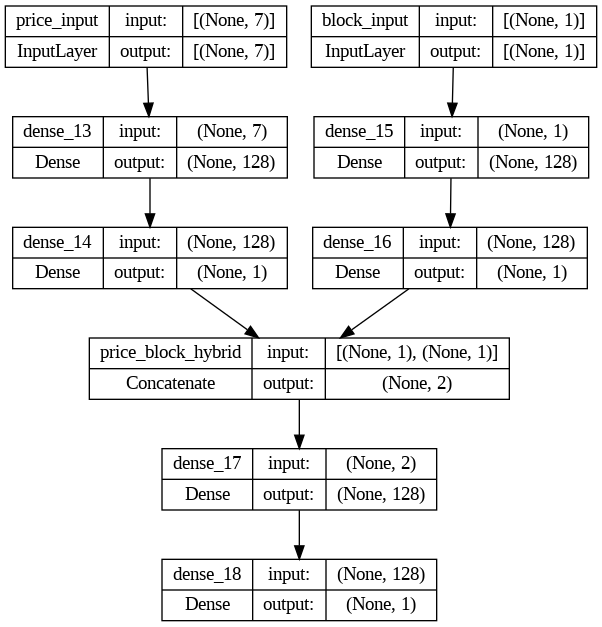

In [134]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_6_2,show_shapes=True)

In [135]:
model_6_2.compile(
    loss="mae",
    optimizer="Adam",
    metrics=["mae","mse"]
)

In [136]:
#Make train and test sets using indexing
split_size=int(len(X)*0.8)
X_train_prices,X_train_block,y_train=X_prices[:split_size],X_block_reward[:split_size],y[:split_size]
X_test_prices,X_test_block,y_test=X_prices[split_size:],X_block_reward[split_size:],y[split_size:]

In [137]:
model_6_2.fit(x=(X_train_prices,X_train_block),
              y=y_train,
              epochs=100,
              validation_data=((X_test_prices,X_test_block),y_test),
              callbacks=[create_model_checkpoint(model_6_2.name)]
              )

Epoch 1/100
70/70 [==============================] - 5s 37ms/step - loss: 813.7073 - mae: 813.7073 - mse: 3590434.0000 - val_loss: 1028.2798 - val_mae: 1028.2798 - val_mse: 3548681.2500
Epoch 2/100
70/70 [==============================] - 1s 21ms/step - loss: 181.1194 - mae: 181.1194 - mse: 165653.4062 - val_loss: 984.4013 - val_mae: 984.4013 - val_mse: 3041502.5000
Epoch 3/100
70/70 [==============================] - 1s 20ms/step - loss: 178.8866 - mae: 178.8866 - mse: 166076.2344 - val_loss: 965.7722 - val_mae: 965.7722 - val_mse: 2836674.5000
Epoch 4/100
70/70 [==============================] - 1s 21ms/step - loss: 166.1359 - mae: 166.1359 - mse: 143857.4062 - val_loss: 857.4875 - val_mae: 857.4875 - val_mse: 2429860.2500
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 154.0237 - mae: 154.0237 - mse: 124029.2656 - val_loss: 880.9269 - val_mae: 880.9269 - val_mse: 2323981.2500
Epoch 6/100
70/70 [==============================] - 1s 20ms/step - loss: 144.6158 

In [138]:
model_6_2.evaluate((X_test_prices,X_test_block),y_test)

18/18 [==============================] - 0s 3ms/step - loss: 583.9274 - mae: 583.9274 - mse: 1177398.6250


[583.9274291992188, 583.9274291992188, 1177398.625]

In [139]:
model_6_2=tf.keras.models.load_model("/content/model_experiments/Price_block_embedding")

In [140]:
model_6_2.evaluate((X_test_prices,X_test_block),y_test)

18/18 [==============================] - 0s 3ms/step - loss: 562.9882 - mae: 562.9882 - mse: 1155326.8750


[562.9881591796875, 562.9881591796875, 1155326.875]

In [141]:
model_6_2_preds=tf.squeeze(model_6_2.predict((X_test_prices,X_test_block)))

18/18 [==============================] - 0s 2ms/step


In [142]:
# Evaluate predictions to get eval metrics
model_6_2_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_2_preds
                               )
model_6_2_results

{'mae': 562.98804,
 'mape': 2.5323727,
 'mase': 0.989014,
 'mse': 1155327.0,
 'rmse': 1074.8613}

In [143]:
model_6_results

{'mae': 562.9172,
 'mape': 2.5184124,
 'mase': 0.9888896,
 'mse': 1148197.4,
 'rmse': 1071.5397}

## Model 7: N-BEATS algorithm

Paper link : https://arxiv.org/pdf/1905.10437.pdf

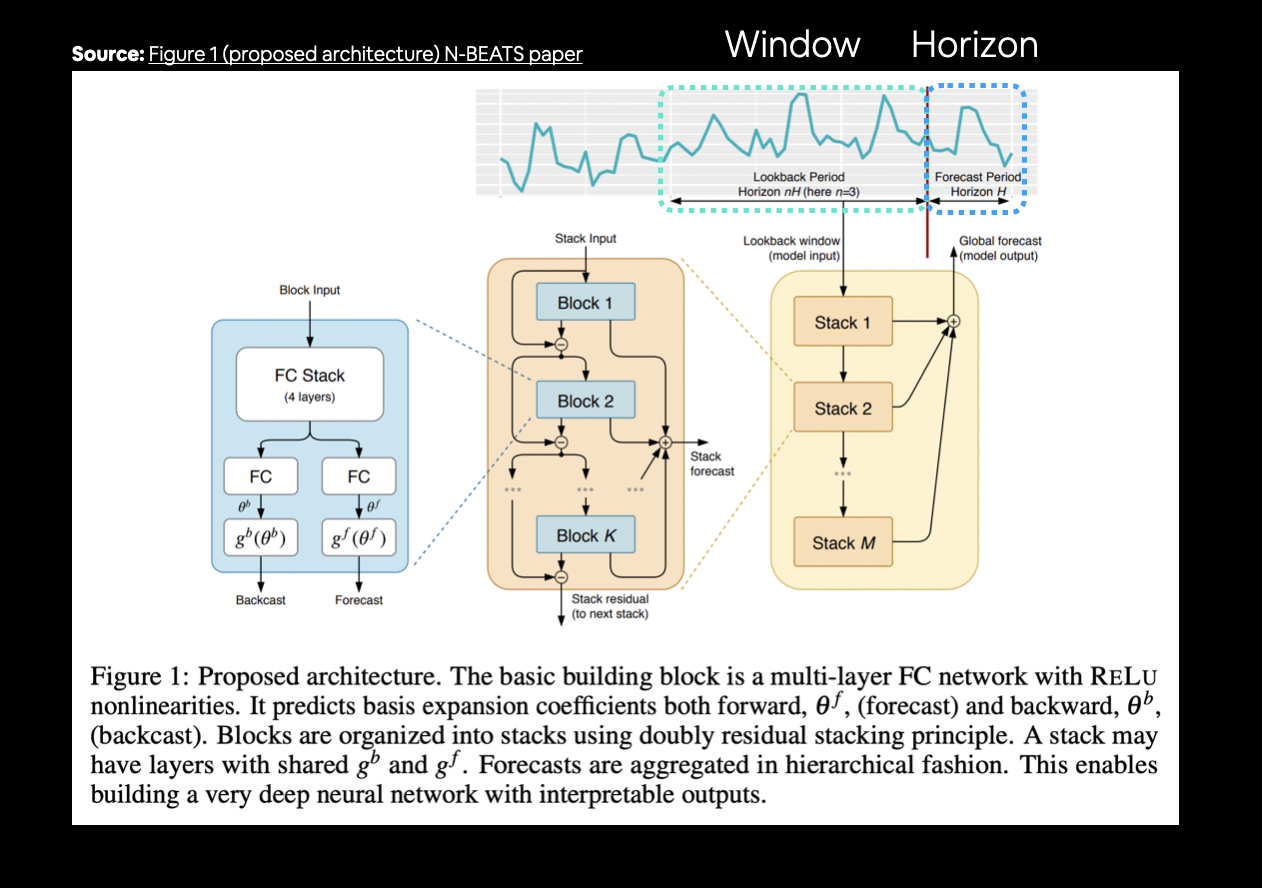

In [144]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

 Checking NBEATS class

In [145]:
#Setup dummy NBEATS layer to represent inputs and outputs
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON,#backcast+forecast
                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4
                                     )

In [146]:
# Create dummy inputs (have to  be same size)
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)#input shape to model , reflect dense layer input requirements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [147]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.09550467  0.15184234  0.30388656  0.14133157  0.47596103  0.14394915
  0.1628272 ]
Forecast: -0.41690030694007874


In [148]:
HORIZON=1
WINDOW_SIZE=7

In [149]:
#Create N-beats data inputs
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [150]:
# Add window columns 
bitcoin_prices_nbeats=bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Prices+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()  

Price   Prices+1   Prices+2   Prices+3   Prices+4  Prices+5  \
Date                                                                          
2013-10-01  123.65499        NaN        NaN        NaN        NaN       NaN   
2013-10-02  125.45500  123.65499        NaN        NaN        NaN       NaN   
2013-10-03  108.58483  125.45500  123.65499        NaN        NaN       NaN   
2013-10-04  118.67466  108.58483  125.45500  123.65499        NaN       NaN   
2013-10-05  121.33866  118.67466  108.58483  125.45500  123.65499       NaN   

            Prices+6  Prices+7  
Date                            
2013-10-01       NaN       NaN  
2013-10-02       NaN       NaN  
2013-10-03       NaN       NaN  
2013-10-04       NaN       NaN  
2013-10-05       NaN       NaN

In [151]:
#Make features and labels
X=bitcoin_prices_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_prices_nbeats.dropna()["Price"]

#Make train and test sets
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]

In [152]:
# Using tf.data API
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

#Combine labels and features
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

#Batch and prefetch
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters

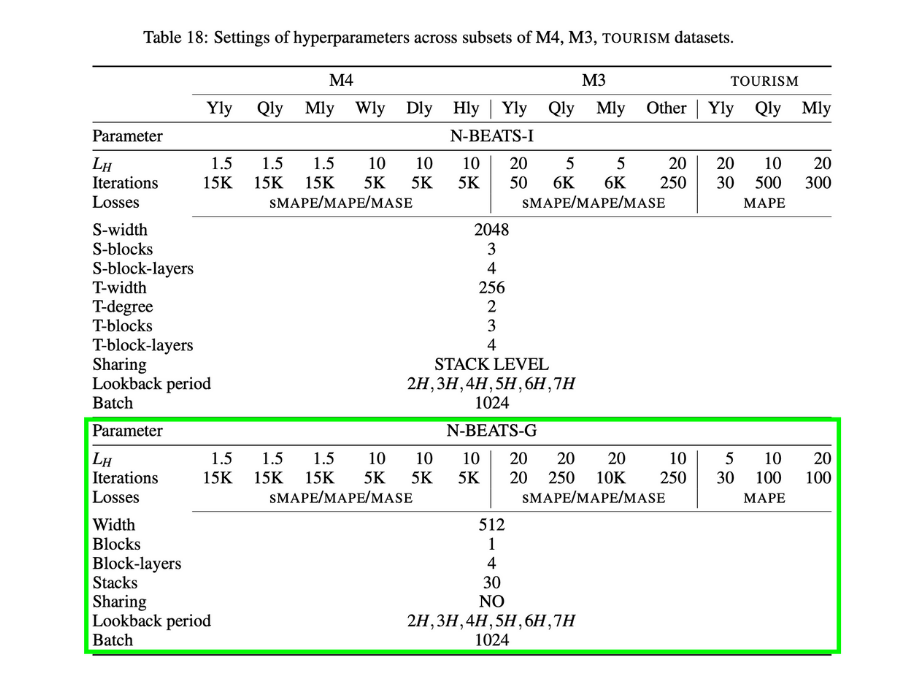

In [153]:
#Values from paper
N_EPOCHS=5000
N_NEURONS= 512 #Depth is no of layers , width is no of neurons
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON# called "Lookback" in Table 18
THETA_SIZE=INPUT_SIZE+HORIZON
INPUT_SIZE,THETA_SIZE

(7, 8)

## Getting ready for residual connection
They are helpful for avoiding vanishing gradients problem

In [154]:
#Make tensors
tensor_1=tf.range(10)+10
tensor_2=tf.range(10)
#Subtract
subtracted=layers.subtract([tensor_1,tensor_2])

#Add
added=layers.add([tensor_1,tensor_2])
#Get outputs
print(f"Input tensors:{tensor_1.numpy()} & {tensor_2.numpy()}")

print(f"Subtracted:{subtracted.numpy()}")

print(f"Added:{added.numpy()}")

Input tensors:[10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted:[10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


In [155]:
tensor_1,tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

## Building , Compiling and fitting N-Beats algorithm


1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:


* tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
* tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [156]:
%%time

tf.random.set_seed(42)

#1. setup instance of N-beat block
nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name="InitialBlock"
                               )
#2. Create input to stack
stack_input=layers.Input(shape=(INPUT_SIZE),name="stack_input")

#3. Create Initial backcast and forecast input (backwards prediction + horizon prediction)
residuals,forecast=nbeats_block_layer(stack_input)

#4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):#First stack is already created in 3
  
  #5. Use NbeatBlock to calculate the backcast and forecast
  backcast,block_forecast=NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatBlock_{i}"
  )(residuals) #pass in residuals

  #6. Create the double residual stacking
  residuals=layers.subtract([residuals,backcast],name=f"subtact_{i}")
  forecast=layers.add([forecast,block_forecast],name=f"add_{i}")

#7. put stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_N_Beats")

#8. compile
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#9.fit
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True
                                                        ),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1
                                                            )
                      ]
            )


Epoch 1/5000
3/3 [==============================] - 55s 978ms/step - loss: 2471.9873 - val_loss: 489623.5938 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 152ms/step - loss: 14470.4170 - val_loss: 2305.5891 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 67ms/step - loss: 862.0010 - val_loss: 7714.5386 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 62ms/step - loss: 933.4719 - val_loss: 8734.3770 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 62ms/step - loss: 2781.5471 - val_loss: 51528.8203 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 64ms/step - loss: 10261.0693 - val_loss: 8636.7354 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 131ms/step - loss: 1515.5929 - val_loss: 1147.8799 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 63ms/step - loss: 898.2152 - val_loss: 2504.4905 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] 

In [157]:
#Evaluate N-Beats model on test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 577.1421


577.14208984375

In [158]:
#Make predictions with N-Beats model
model_7_preds=make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8889.914, 8816.021, 9023.677, 8785.159, 8764.632, 8750.01 ,
       8673.137, 8550.369, 8475.821, 8526.842], dtype=float32)>

In [159]:
#Evaluate N-BEATS model preds
model_7_results=evaluate_preds(y_true=y_test,
                               y_pred=model_7_preds
                               )
model_7_results

{'mae': 577.1421,
 'mape': 2.6191475,
 'mase': 1.0138788,
 'mse': 1202575.5,
 'rmse': 1096.62}

In [160]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

## Plotting the N-Beat architecture


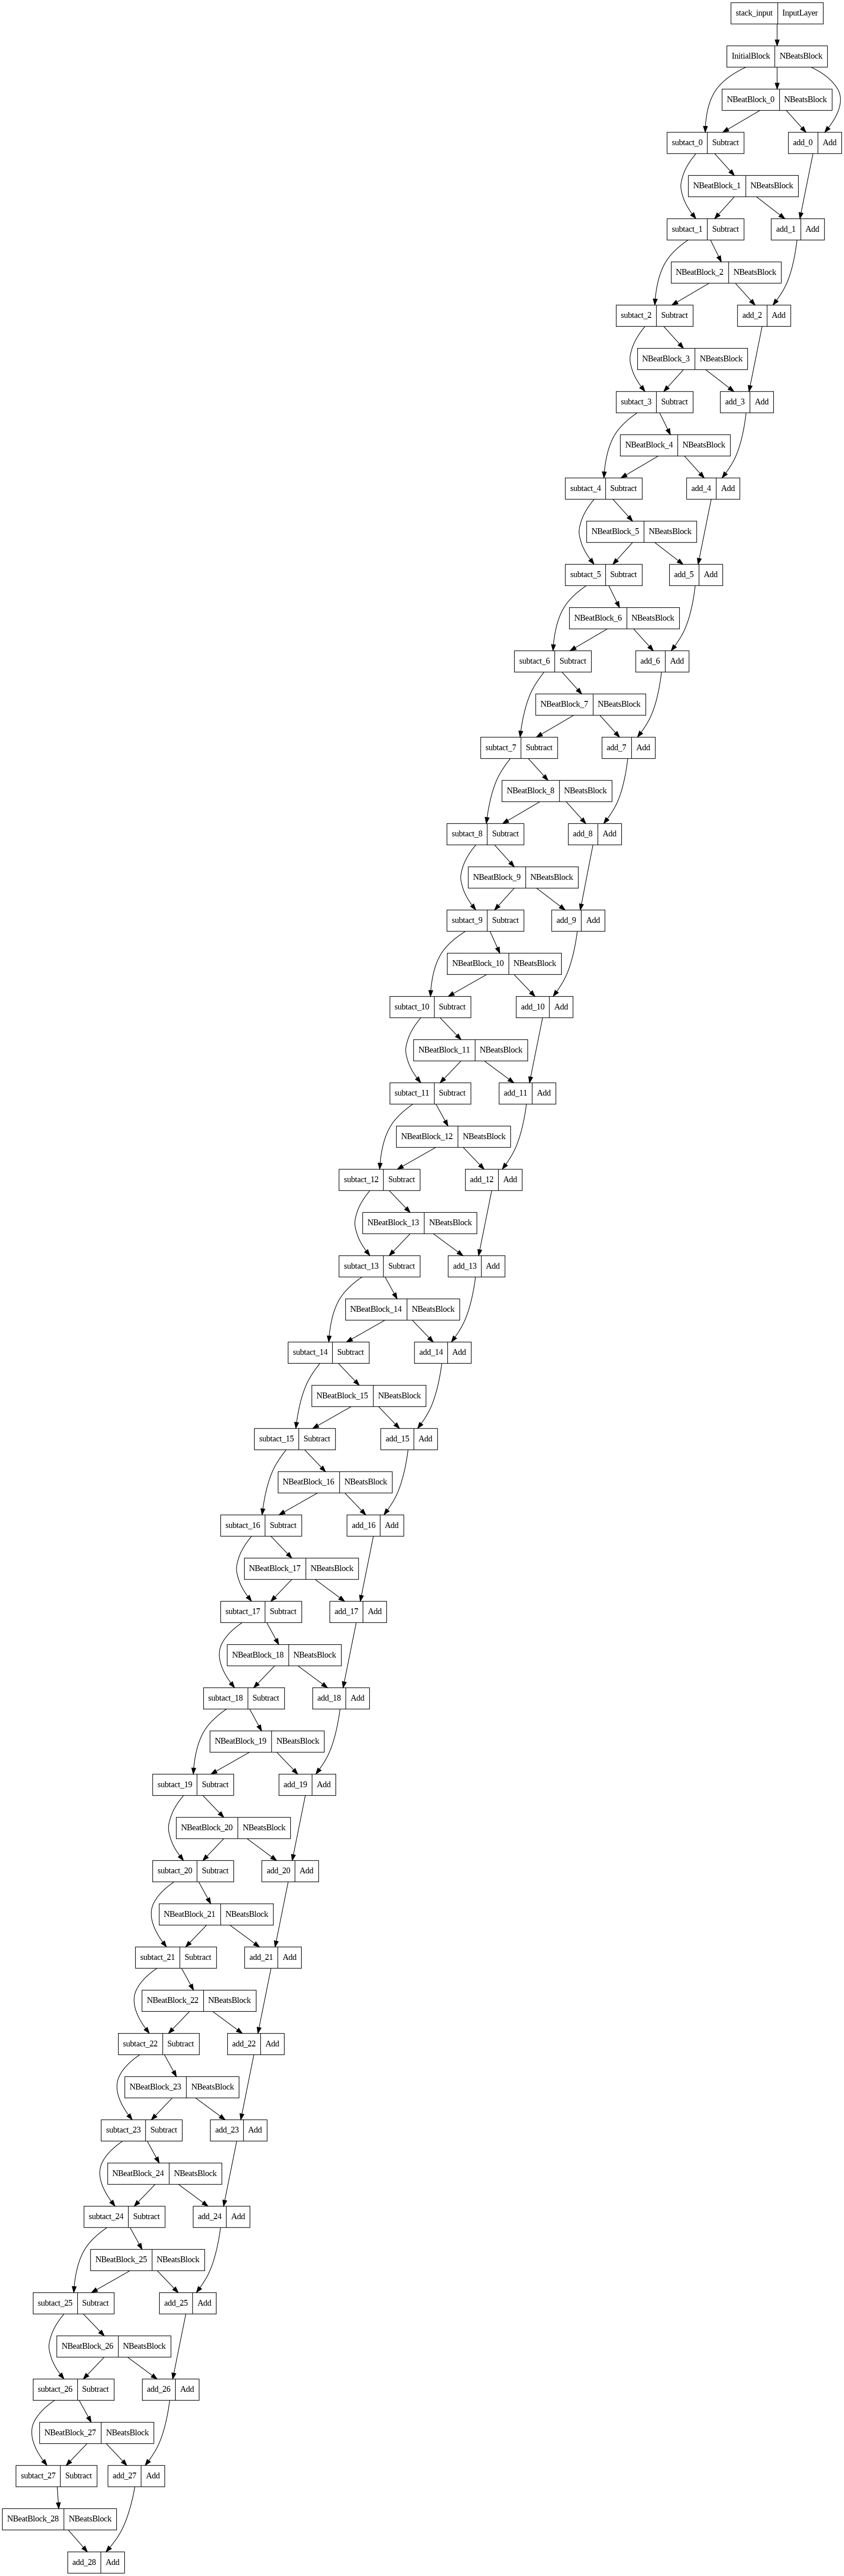

In [161]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [162]:
HORIZON,WINDOW_SIZE

(1, 7)

## Constructing and fitting and ensemble of models (using different loss functions)

In [163]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, # how many different models we going to train
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]
                        ):
  """
  Returns a list of num_iter models each trained on MAE,MSE and MAPE loss.

  for eg , if num_iter=10 , a list of 30 trained models will be returned:
    10 * len([mae,mse,mape]).

  """
  #Make empty list for trained ensemble models
  ensemble_models=[]
   
  # Create num_iter number of models per loss function

  for i in range(num_iter):
    #Build and fit a new model with different loss function

    for loss_function in loss_fns:
      print(f"Optimizing model by reducing:{loss_function} for {num_epochs} epochs,model number:{i}")

      #Construct model

      model=tf.keras.Sequential([
          # Initialize dense layer with normal distribution for estimation prediction
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(HORIZON)
      ])

      #Compile model
      model.compile(
          loss=loss_function,
          optimizer="Adam",
          metrics=["mae","mse"]
      )

      #Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True
                                                            ),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1
                                                                )
                           ]
                )
      
      #Append fitted model to list of esemble models

      ensemble_models.append(model)


  return ensemble_models

In [164]:
%%time

#Get list of trained ensemble models
ensemble_models=get_ensemble_models(num_iter=5,
                                    num_epochs=1000
                                    )

Optimizing model by reducing:mae for 1000 epochs,model number:0

Epoch 266: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing:mse for 1000 epochs,model number:0

Epoch 316: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 416: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mape for 1000 epochs,model number:0

Epoch 263: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 667: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 767: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing:mae for 1000 epochs,model number:1

Epoch 719: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 908: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:mse for 1000 epochs,model number:1
Optimizing model by reducing:mape for 1

In [165]:
len(ensemble_models)

15

In [166]:
ensemble_models

## Make predictions with Ensemble model

In [167]:
# Creating function which uses a list of trained models to make and return list of predictions
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]

  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))  

In [168]:
# Create a list of ensemble predictions
%%time
ensemble_preds=make_ensemble_preds(ensemble_models=ensemble_models,
                                   data=test_dataset
                                   )

ensemble_preds

1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 43ms/step
CPU times: user 899 ms, sys: 37.4 ms, total: 937 ms
Wall time: 1.03 s


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8826.117,  8812.019,  9026.356, ..., 50008.277, 48897.95 ,
        46209.01 ],
       [ 8710.681,  8675.425,  9060.07 , ..., 49463.72 , 47999.16 ,
        45683.22 ],
       [ 8822.255,  8783.921,  9096.743, ..., 49941.03 , 47955.742,
        45564.414],
       ...,
       [ 8740.372,  8692.188,  9018.943, ..., 49462.332, 48719.91 ,
        46049.684],
       [ 8836.558,  8809.796,  9051.017, ..., 50167.867, 48201.715,
        46178.4  ],
       [ 8761.616,  8743.19 ,  9056.409, ..., 50261.53 , 48138.07 ,
        46157.406]], dtype=float32)>

In [169]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8826.117,  8812.019,  9026.356, ..., 50008.277, 48897.95 ,
        46209.01 ],
       [ 8710.681,  8675.425,  9060.07 , ..., 49463.72 , 47999.16 ,
        45683.22 ],
       [ 8822.255,  8783.921,  9096.743, ..., 49941.03 , 47955.742,
        45564.414],
       ...,
       [ 8740.372,  8692.188,  9018.943, ..., 49462.332, 48719.91 ,
        46049.684],
       [ 8836.558,  8809.796,  9051.017, ..., 50167.867, 48201.715,
        46178.4  ],
       [ 8761.616,  8743.19 ,  9056.409, ..., 50261.53 , 48138.07 ,
        46157.406]], dtype=float32)>

In [170]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

In [171]:
#Evaluate ensemble model predictions
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_preds
                                )
ensemble_results

{'mae': 577.8646,
 'mape': 2.6377397,
 'mase': 1.015148,
 'mse': 1169157.2,
 'rmse': 1081.184}

In [172]:
ensemble_mean=tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8778.322, 8767.172, 9056.003, 8716.883, 8748.405, 8723.938,
       8646.284, 8475.353, 8454.864, 8516.617], dtype=float32)>

In [173]:
ensemble_median=np.median(ensemble_preds,axis=0)
ensemble_median[:10]

array([8787.238, 8783.921, 9056.409, 8704.505, 8753.821, 8734.751,
       8648.947, 8473.783, 8460.273, 8519.311], dtype=float32)

In [174]:
#Evaluate ensemble model predictions
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_mean
                                )
ensemble_results

{'mae': 567.0339,
 'mape': 2.5680816,
 'mase': 0.99612147,
 'mse': 1140267.1,
 'rmse': 1067.8329}

In [175]:
#Evaluate ensemble model predictions
ensemble_results=evaluate_preds(y_true=y_test,
                                y_pred=ensemble_median
                                )
ensemble_results

{'mae': 566.706,
 'mape': 2.561857,
 'mase': 0.99554545,
 'mse': 1141297.0,
 'rmse': 1068.3151}

In [176]:
model_6_2_results

{'mae': 562.98804,
 'mape': 2.5323727,
 'mase': 0.989014,
 'mse': 1155327.0,
 'rmse': 1074.8613}

In [177]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

### Plotting the prediction intervals (uncertanity estimates) of our ensemble

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [178]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):#1.Take prediction from no. of randomly initialized models
  
  #2. Measure std(standard deviation) of predictions
  std=tf.math.reduce_std(preds,axis=0)

  #3. Multiply std with 1.96

  interval=1.96 * std

  #4. Get the prediction upper and lower bound
  preds_mean=tf.reduce_mean(preds,axis=0)
  lower,upper=preds_mean-interval,preds_mean+interval

  return lower,upper



In [179]:
#Get the upper and lower bounds
lower,upper=get_upper_lower(preds=ensemble_preds)
lower[:5],upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8700.991, 8678.39 , 8992.056, 8625.616, 8664.113], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8855.653, 8855.954, 9119.95 , 8808.149, 8832.697], dtype=float32)>)

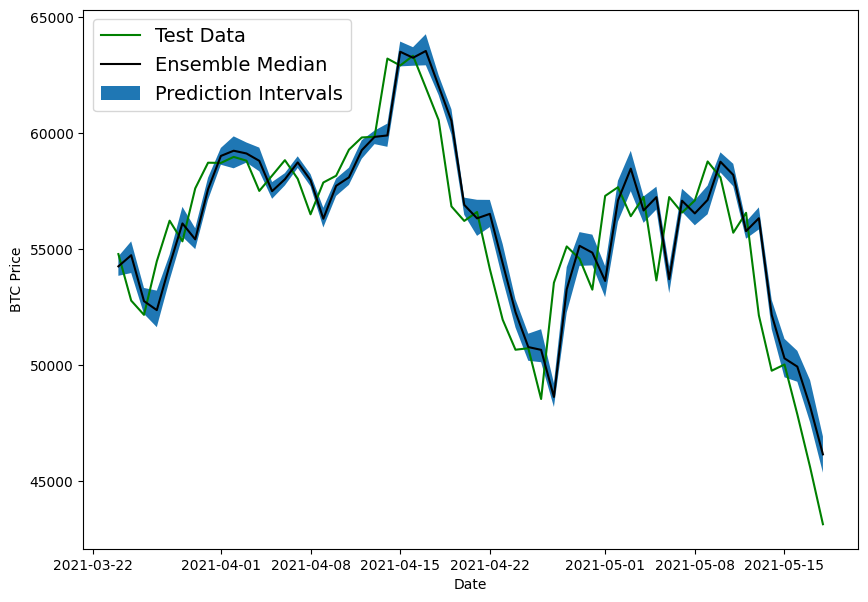

In [180]:
#Get the median/mean values of our ensemble preds
ensemble_median=np.median(ensemble_preds,axis=0)

#Plot the median of our ensemble preds along with prediction intervals
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label="Test Data")
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],label="Prediction Intervals"
                 )
plt.legend(loc="upper left",fontsize=14);

## Model 9 : Train a modelon the full historical data to make prediction

In [181]:
HORIZON=1
WINDOW_SIZE=7

In [182]:
bitcoin_prices_windowed.head()

Price block_reward   Prices+1   Prices+2   Prices+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

             Prices+4  Prices+5  Prices+6  Prices+7  
Date                                                 
2013-10-01        NaN       NaN       NaN       NaN  
2013-10-02        NaN       NaN       NaN       NaN  
2013-10-03        NaN       NaN       NaN       NaN  
2013-10-04        NaN       NaN       NaN       NaN  
2013-10-05  123.65499       NaN       NaN       NaN

In [183]:
# Train model on entire data to make prediction for next day
X_all=bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
#Get labels
y_all=bitcoin_prices.dropna()["Price"].to_numpy()

In [184]:
# Turn data into efficient running tensors
feature_dataset_all=tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all=tf.data.Dataset.from_tensor_slices(y_all)

#Combine features and labels
dataset_all=tf.data.Dataset.zip((feature_dataset_all,labels_dataset_all))

#Batch and prefetch for optimial performance
BATCH_SIZE=1024
dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [185]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
])

model_9.compile(
    loss="mae",
    optimizer="Adam"
)

model_9.fit(dataset_all,
            epochs=100
            )

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 5915.8340
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 3451.3389
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1024.0354
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1304.0253
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1802.3516
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1225.9298
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 322.4655
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 777.5117
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 783.1816
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 325.4517
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 540.2484
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 496.9012
Epoch 13/100
3/3 [=============

## Make predictions into future

In [186]:
# How many timesteps into the future?
INTO_FUTURE=14

1. Function which takes as input:
* a list of values (the Bitcoin historical data)
* a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction
* Eventually future predictions will be made using the model's own previous predictions as input

In [187]:
# 1.  Create function to make prediction into the future

def make_future_forecast(values,model,into_future,window_size=WINDOW_SIZE):
  """
  Make  future forecast into_future steps after values ends.
  
  Returns future_forecast as a list  of floats.
  """
  #2. Make empty list for future forecast/prepare data to forecast on
  future_forecast=[]
  last_window=values[-window_size:]
  
  #3. Make INTO_FUTURE no of predictions,altering the data which get predicted on each time
  for _ in range(INTO_FUTURE):
    #Predict on the last window then append it again,again,again(model will eventually start to make forecast on its own forecast)
    future_pred=model.predict(tf.expand_dims(last_window,axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction:{tf.squeeze(future_pred).numpy()}\n")

    #Append predictions to future forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    #Update last window with new pred and get window size most recent pred 
    last_window=np.append(last_window,future_pred)[-window_size:]

  return future_forecast

In [188]:
#Make forecast into the future
future_forecast=make_future_forecast(values=y_all,
                                     model=model_9,
                                     into_future=INTO_FUTURE,
                                     window_size=WINDOW_SIZE
                                     )

1/1 [==============================] - 0s 57ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction:43969.2578125

1/1 [==============================] - 0s 22ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 43969.2578125 ] -> Prediction:43704.97265625

1/1 [==============================] - 0s 23ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 43969.2578125  43704.97265625] -> Prediction:43137.76953125

1/1 [==============================] - 0s 25ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 43969.2578125  43704.97265625 43137.76953125] -> Prediction:42719.92578125

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 43969.2578125
 43704.97265625 43137.76953125 42719.92578125] ->

In [189]:
future_forecast

[43969.258,
 43704.973,
 43137.77,
 42719.926,
 42517.367,
 42515.09,
 42179.902,
 41946.645,
 41744.793,
 41565.547,
 41365.656,
 41136.35,
 40943.15,
 40743.92]

In [193]:
def get_future_dates(start_date,into_future,offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date=start_date+ np.timedelta64(offset,"D") #Specify start date, "D" stands for Day
  end_date=start_date+np.timedelta64(into_future,"D") #Specify end date

  return np.arange(start_date,end_date,dtype="datetime64[D]") #return date range between start and end date

In [191]:
#Last timestep of timesteps 
last_timesteps=bitcoin_prices.index[-1]
last_timesteps

Timestamp('2021-05-18 00:00:00')

In [194]:
#Get next two  weeks of timesteps
next_time_steps=get_future_dates(start_date=last_timesteps,
                                 into_future=INTO_FUTURE
                                 )

next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [197]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timesteps)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 43969.258, 43704.973, 43137.77 , 42719.926, 42517.367,
        42515.09 , 42179.902, 41946.645, 41744.793, 41565.547, 41365.656,
        41136.35 , 40943.15 , 40743.92 ], dtype=float32))

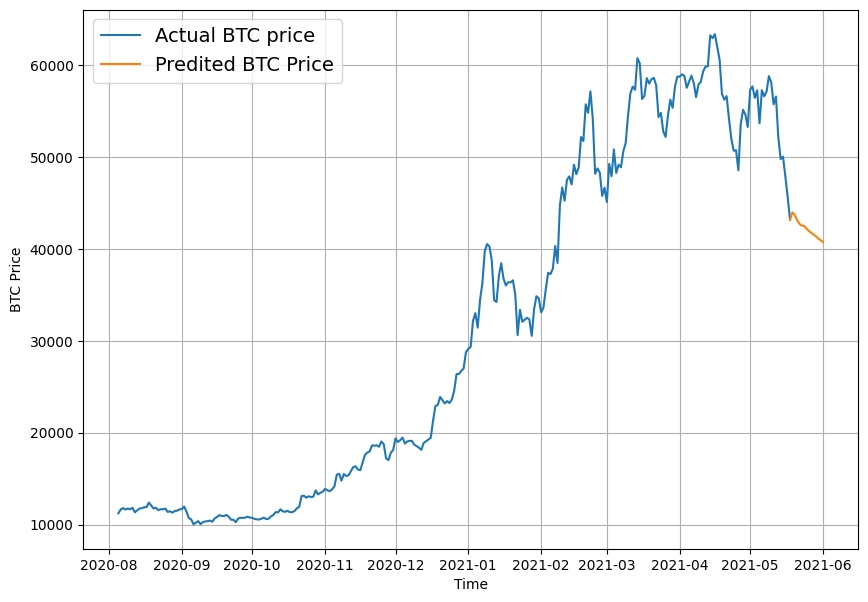

In [198]:
#Plot future prices predictions of bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start=2500,format="-",label="Actual BTC price")
plot_time_series(next_time_steps,future_forecast,format="-",label="Predited BTC Price")

## Model 10 : Turkey Problem

In [199]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [200]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [201]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

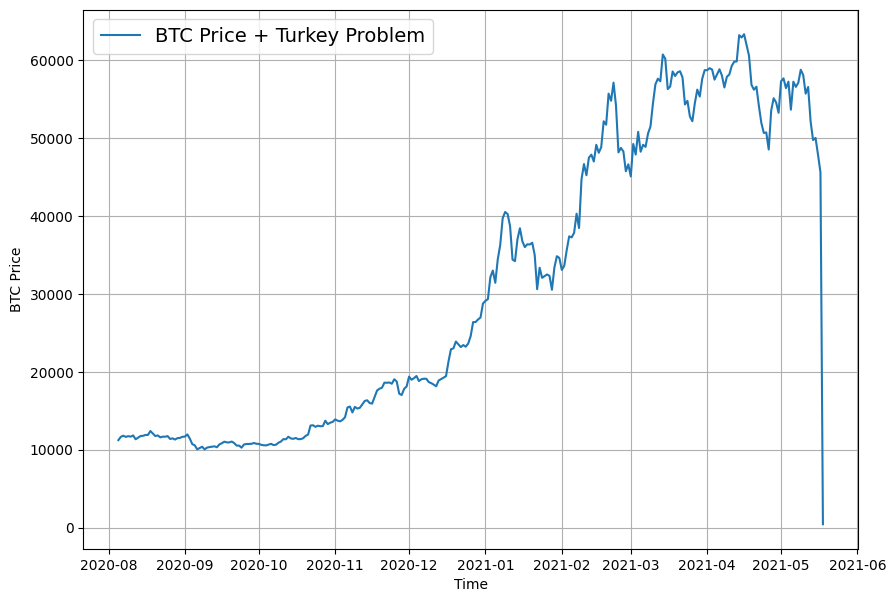

In [202]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC Price + Turkey Problem", 
                 start=2500)

In [203]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Building a turkey model

In [204]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [205]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 753.6715


753.6715087890625

In [206]:

# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 637.7117


637.7117309570312

In [207]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]
     

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8864.385, 8798.804, 9055.22 , 8802.756, 8768.307, 8758.981,
       8695.446, 8536.786, 8481.524, 8545.858], dtype=float32)>

In [208]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17143.629,
 'mape': 121.56001,
 'mase': 26.529821,
 'mse': 615365570.0,
 'rmse': 23739.676}

In [209]:
model_1_results

{'mae': 566.72345,
 'mape': 2.543512,
 'mase': 0.99557614,
 'mse': 1167485.1,
 'rmse': 1080.5022}

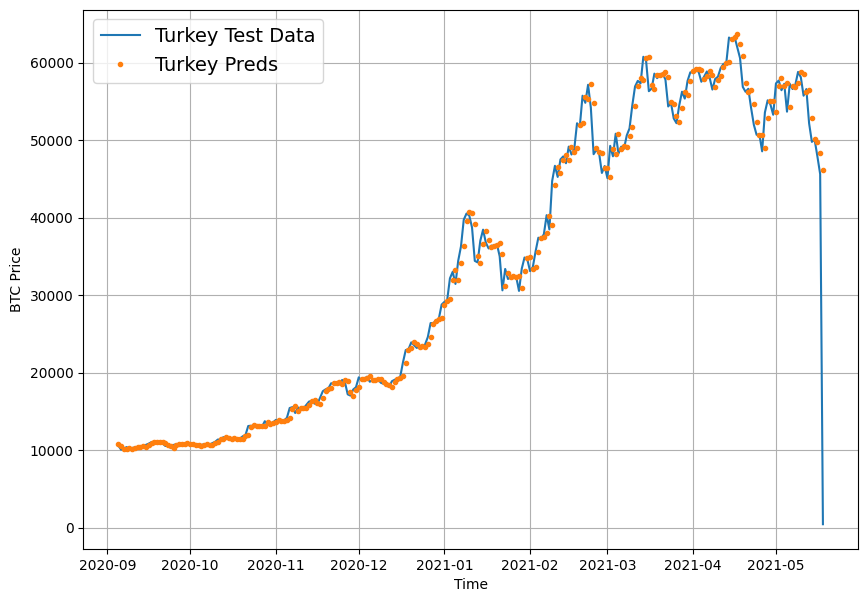

In [210]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);
     


## Compare Models

In [212]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "Model_6_2_Price_window":model_6_2_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

mae      mape      mase          mse  \
naive_model              567.980225  2.516525  0.999570  1147547.000   
model_1_dense_w7_h1      566.723450  2.543512  0.995576  1167485.125   
model_2_dense_w30_h1     596.055115  2.686874  1.041910  1226987.750   
model_3_dense_w30_h7    1271.997070  5.714693  2.263448  5837415.500   
model_4_CONV1D           578.259949  2.607809  1.015843  1203832.500   
model_5_LSTM             593.779602  2.688881  1.043106  1256735.125   
model_6_multivariate     562.917175  2.518412  0.988890  1148197.375   
Model_6_2_Price_window   562.988037  2.532373  0.989014  1155327.000   
model_8_NBEATs           577.142090  2.619148  1.013879  1202575.500   
model_9_ensemble         566.705994  2.561857  0.995545  1141297.000   

                               rmse  
naive_model             1071.236206  
model_1_dense_w7_h1     1080.502197  
model_2_dense_w30_h1    1107.694824  
model_3_dense_w30_h7    1457.881226  
model_4_CONV1D          1097.192993  
model_5_LSTM            1121.041992  
model_6_multivariate    1071.539673  
Model_6_2_Price_window  1074.861328  
model_8_NBEATs          1096.619995  
model_9_ensemble        1068.315063

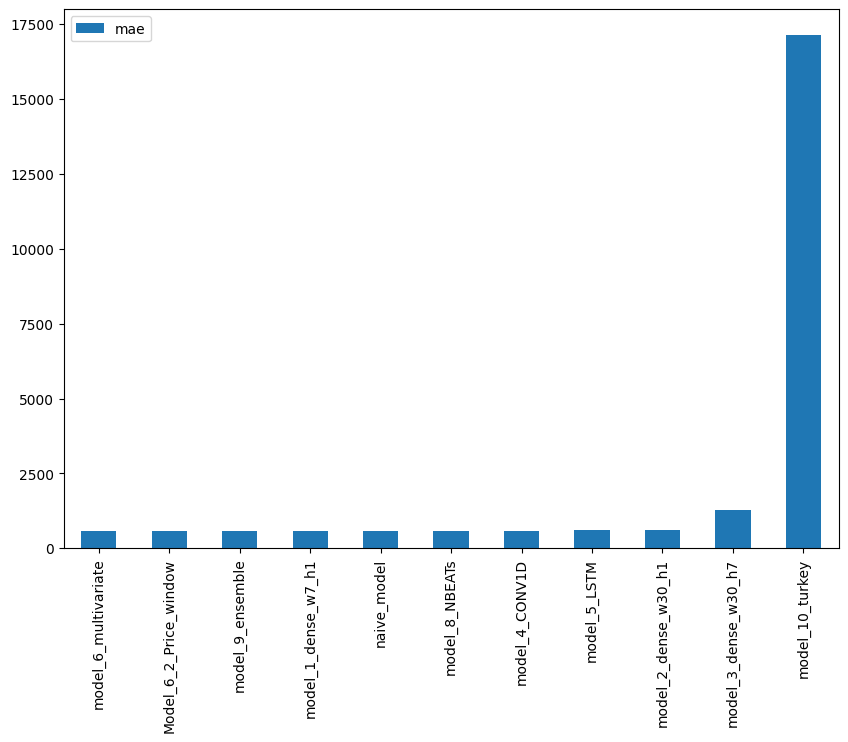

In [213]:

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");
     